### Import Libraries & Set up the view.

In [478]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import plotly.graph_objects as go

# set up to view all the info of the columns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### About Data

Churn data for a fictional Telecommunications company that provides phone and internet services to 7,043 customers in California, and includes details about customer demographics, location, services, and current status.

### Load the Dataset

In [479]:
customer_churn_data_frame=pd.read_csv("telecom_customer_churn.csv")

In [480]:
zip_population_data_frame=pd.read_csv("telecom_zipcode_population.csv")
zip_population_data_frame

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019
...,...,...
1666,96145,4002
1667,96146,942
1668,96148,678
1669,96150,33038


In [481]:
customer_churn_data_frame

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [482]:
### Merging Customer Churn data & ZipCode / Population data using Zipcode

In [483]:
customer_df = pd.merge(customer_churn_data_frame, zip_population_data_frame, on="Zip Code",how='inner')

In [484]:
customer_df.to_csv("original_churn.csv",index=False)

In [485]:
churn_df=customer_df.copy()

In [486]:
churn_df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,5183-SNMJQ,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,10,Offer D,Yes,45.69,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,95.10,865.10,43.25,0,456.90,1278.75,Stayed,NaN,NaN,4498
2,6847-KJLTS,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,58,Offer B,Yes,47.34,Yes,Yes,Fiber Optic,28.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,100.40,5749.80,0.00,0,2745.72,8495.52,Stayed,NaN,NaN,4498
3,8788-DOXSU,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,59,None,Yes,9.70,No,Yes,DSL,6.0,No,No,Yes,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,61.35,3645.50,0.00,0,572.30,4217.80,Stayed,NaN,NaN,4498
4,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9396-ZSFLL,Female,64,No,0,Carpinteria,93013,34.441398,-119.513163,0,15,None,Yes,13.58,Yes,Yes,DSL,19.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,48.85,631.40,32.09,0,203.70,803.01,Stayed,NaN,NaN,17409
7039,9281-OFDMF,Male,76,No,0,Meadow Valley,95956,39.937017,-121.058043,0,39,None,Yes,20.06,Yes,Yes,Fiber Optic,3.0,No,Yes,No,No,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,90.70,3413.25,0.00,0,782.34,4195.59,Stayed,NaN,NaN,301
7040,9494-MRNYX,Male,22,No,0,Meadow Valley,95956,39.937017,-121.058043,0,10,None,Yes,17.98,Yes,Yes,Fiber Optic,26.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.05,786.30,0.00,0,179.80,966.10,Stayed,NaN,NaN,301
7041,9565-JSNFM,Male,39,No,0,Meadow Valley,95956,39.937017,-121.058043,0,38,None,Yes,33.71,No,Yes,Fiber Optic,17.0,No,No,No,No,No,No,No,Yes,One Year,Yes,Bank Withdrawal,70.45,2597.60,0.00,0,1280.98,3878.58,Churned,Price,Lack of affordable download/upload speed,301


###  Data Cleaning

In [487]:
# Replace the spaces from the text with "_"
churn_df.columns=churn_df.columns.str.replace(" ","_",regex=True)

In [488]:
churn_df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason',
       'Population'],
      dtype='object')

In [489]:
# Check the null values in the dataset
churn_df.isnull().sum().to_frame("counts")

,counts
Customer_ID,0
Gender,0
Age,0
Married,0
Number_of_Dependents,0
City,0
Zip_Code,0
Latitude,0
Longitude,0
Number_of_Referrals,0


In [490]:
# Check the null values in the dataset in percentage wise
(churn_df.isnull().sum()/churn_df.shape[0] * 100).to_frame("Percentage_Counts")

,Percentage_Counts
Customer_ID,0.000000
Gender,0.000000
Age,0.000000
Married,0.000000
Number_of_Dependents,0.000000
City,0.000000
Zip_Code,0.000000
Latitude,0.000000
Longitude,0.000000
Number_of_Referrals,0.000000


In [491]:
# Check the duplicates records
churn_df.duplicated().any()

False


 Data is being checked to make sure there aren't any duplicate customers.There are no duplicate values found!.

In [492]:

# Uderstanding the dataset with info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number_of_Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip_Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number_of_Referrals                7043 non-null   int64  
 10  Tenure_in_Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [493]:
# Check records with null entries
churn_df[churn_df.isnull().any(axis=1)]

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,5183-SNMJQ,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,10,Offer D,Yes,45.69,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,95.10,865.10,43.25,0,456.90,1278.75,Stayed,NaN,NaN,4498
2,6847-KJLTS,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,58,Offer B,Yes,47.34,Yes,Yes,Fiber Optic,28.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,100.40,5749.80,0.00,0,2745.72,8495.52,Stayed,NaN,NaN,4498
3,8788-DOXSU,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,59,None,Yes,9.70,No,Yes,DSL,6.0,No,No,Yes,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,61.35,3645.50,0.00,0,572.30,4217.80,Stayed,NaN,NaN,4498
4,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9239-GZHZE,Female,25,Yes,0,Carpinteria,93013,34.441398,-119.513163,6,72,Offer A,Yes,24.85,Yes,Yes,Fiber Optic,47.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,113.65,8124.20,0.00,0,1789.20,9913.40,Stayed,NaN,NaN,17409
7038,9396-ZSFLL,Female,64,No,0,Carpinteria,93013,34.441398,-119.513163,0,15,None,Yes,13.58,Yes,Yes,DSL,19.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,48.85,631.40,32.09,0,203.70,803.01,Stayed,NaN,NaN,17409
7039,9281-OFDMF,Male,76,No,0,Meadow Valley,95956,39.937017,-121.058043,0,39,None,Yes,20.06,Yes,Yes,Fiber Optic,3.0,No,Yes,No,No,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,90.70,3413.25,0.00,0,782.34,4195.59,Stayed,NaN,NaN,301
7040,9494-MRNYX,Male,22,No,0,Meadow Valley,95956,39.937017,-121.058043,0,10,None,Yes,17.98,Yes,Yes,Fiber Optic,26.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.05,786.30,0.00,0,179.80,966.10,Stayed,NaN,NaN,301


In [494]:
churn_df[churn_df.isnull().any(axis=1)].shape

(5457, 39)

In [495]:
# Cleaning the data fill values
churn_df.Multiple_Lines=churn_df.Multiple_Lines.fillna("No Phone Services",axis=0)

In [496]:
churn_df.Avg_Monthly_Long_Distance_Charges=churn_df.Avg_Monthly_Long_Distance_Charges.fillna(0,axis=0)

In [497]:
churn_df[["Internet_Type","Avg_Monthly_GB_Download","Online_Security","Online_Backup","Device_Protection_Plan",
"Premium_Tech_Support","Streaming_TV","Streaming_Movies","Streaming_Music","Unlimited_Data"]]= churn_df[["Internet_Type","Avg_Monthly_GB_Download","Online_Security","Online_Backup","Device_Protection_Plan",
"Premium_Tech_Support","Streaming_TV","Streaming_Movies","Streaming_Music","Unlimited_Data"]].fillna("No Internet Services",axis=0)

In [498]:
categorical_df=churn_df.dtypes=="object"
categorical_df=categorical_df[categorical_df==True].index.tolist()
categorical_df.pop(0)
categorical_df

['Gender',
 'Married',
 'City',
 'Offer',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Internet_Type',
 'Avg_Monthly_GB_Download',
 'Online_Security',
 'Online_Backup',
 'Device_Protection_Plan',
 'Premium_Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Streaming_Music',
 'Unlimited_Data',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Customer_Status',
 'Churn_Category',
 'Churn_Reason']

In [499]:
churn_df[["Churn_Category","Churn_Reason"]]=churn_df[["Churn_Category","Churn_Reason"]].fillna("No churn",axis=0)

In [500]:
churn_df.isnull().sum().to_frame("counts")

,counts
Customer_ID,0
Gender,0
Age,0
Married,0
Number_of_Dependents,0
City,0
Zip_Code,0
Latitude,0
Longitude,0
Number_of_Referrals,0


In [501]:
churn_df.to_csv("Churn_Clean.csv",index=False)

In [502]:
numerical_df=churn_df.dtypes != "object"
numerical_df=numerical_df[numerical_df==True].index.tolist()
numerical_df

['Age',
 'Number_of_Dependents',
 'Zip_Code',
 'Latitude',
 'Longitude',
 'Number_of_Referrals',
 'Tenure_in_Months',
 'Avg_Monthly_Long_Distance_Charges',
 'Monthly_Charge',
 'Total_Charges',
 'Total_Refunds',
 'Total_Extra_Data_Charges',
 'Total_Long_Distance_Charges',
 'Total_Revenue',
 'Population']

In [503]:
print("categorical elements",len(categorical_df))
print("numerical elements",len(numerical_df))

categorical elements 23
numerical elements 15


In [504]:
for i in categorical_df:
    print(churn_df[i].value_counts())
    print("----------")

Male      3555
Female    3488
Name: Gender, dtype: int64
----------
No     3641
Yes    3402
Name: Married, dtype: int64
----------
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64
----------
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64
----------
Yes    6361
No      682
Name: Phone_Service, dtype: int64
----------
No                   3390
Yes                  2971
No Phone Services     682
Name: Multiple_Lines, dtype: int64
----------
Yes    5517
No     1526
Name: Internet_Service, dtype: int64
----------
Fiber Optic             3035
DSL                     1652
No Internet Services    1526
Cable                    830
Name: Internet_Type, dtype: int64
-------

In [505]:
categorical_df

['Gender',
 'Married',
 'City',
 'Offer',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Internet_Type',
 'Avg_Monthly_GB_Download',
 'Online_Security',
 'Online_Backup',
 'Device_Protection_Plan',
 'Premium_Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Streaming_Music',
 'Unlimited_Data',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Customer_Status',
 'Churn_Category',
 'Churn_Reason']

In [506]:
for i in numerical_df:
    print(churn_df[i].value_counts())
    print("----------")

42    156
47    153
40    150
44    148
23    146
     ... 
80     66
78     63
66     63
67     61
72     58
Name: Age, Length: 62, dtype: int64
----------
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: Number_of_Dependents, dtype: int64
----------
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
92105     2
96150     2
91934     2
93711     1
Name: Zip_Code, Length: 1626, dtype: int64
----------
33.362575    43
33.141265    38
32.857230    36
32.825086    34
32.886925    32
             ..
35.363339     2
32.741859     2
38.911577     2
32.649787     2
36.833002     1
Name: Latitude, Length: 1626, dtype: int64
----------
-117.299644    43
-116.967221    38
-117.209774    36
-117.199424    34
-117.152162    32
               ..
-117.090353     2
-117.637641     2
-120.106169     2
-116.223700     2
-119.829470     1
Name: Longitude, Length: 1625, dtype: int64
----------
0     3821
1     1086


In [507]:
# Iterate over all column names of Dataframe
for col in churn_df.columns:
    # Select the column by name and get count of unique values in it
    count = churn_df[col].nunique()
    print(col, ': ', count)



Customer_ID :  7043
Gender :  2
Age :  62
Married :  2
Number_of_Dependents :  10
City :  1106
Zip_Code :  1626
Latitude :  1626
Longitude :  1625
Number_of_Referrals :  12
Tenure_in_Months :  72
Offer :  6
Phone_Service :  2
Avg_Monthly_Long_Distance_Charges :  3584
Multiple_Lines :  3
Internet_Service :  2
Internet_Type :  4
Avg_Monthly_GB_Download :  50
Online_Security :  3
Online_Backup :  3
Device_Protection_Plan :  3
Premium_Tech_Support :  3
Streaming_TV :  3
Streaming_Movies :  3
Streaming_Music :  3
Unlimited_Data :  3
Contract :  3
Paperless_Billing :  2
Payment_Method :  3
Monthly_Charge :  1591
Total_Charges :  6540
Total_Refunds :  500
Total_Extra_Data_Charges :  16
Total_Long_Distance_Charges :  6068
Total_Revenue :  6975
Customer_Status :  3
Churn_Category :  6
Churn_Reason :  21
Population :  1569


In [508]:
no_phone_services=churn_df.loc[churn_df["Phone_Service"]== "No" ]
no_phone_services

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
12,7614-QVWQL,Male,57,Yes,0,Costa Mesa,92627,33.645672,-117.922613,2,49,None,No,0.0,No Phone Services,Yes,DSL,5.0,No,Yes,No,No,Yes,Yes,Yes,No,One Year,Yes,Bank Withdrawal,51.80,2541.25,0.0,50,0.0,2591.25,Churned,Other,Moved,62069
27,5590-YRFJT,Female,44,Yes,0,Lompoc,93437,34.757477,-120.550507,1,20,None,No,0.0,No Phone Services,Yes,DSL,10.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,24.45,482.80,0.0,0,0.0,482.80,Churned,Other,Don't know,6165
39,8070-AAWZP,Male,68,Yes,0,Sheridan,95681,38.984756,-121.345074,3,24,None,No,0.0,No Phone Services,Yes,Cable,28.0,No,No,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,34.25,828.20,0.0,0,0.0,828.20,Stayed,No churn,No churn,1219
40,0017-DINOC,Male,47,No,0,Rancho Santa Fe,92091,32.993560,-117.207121,0,54,None,No,0.0,No Phone Services,Yes,Cable,10.0,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.20,2460.55,0.0,0,0.0,2460.55,Stayed,No churn,No churn,1072
57,0019-GFNTW,Female,39,No,0,Los Olivos,93441,34.704340,-120.026090,0,56,None,No,0.0,No Phone Services,Yes,DSL,19.0,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,45.05,2560.10,0.0,0,0.0,2560.10,Stayed,No churn,No churn,1317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,8780-YRMTT,Female,64,No,0,Yountville,94599,38.421458,-122.365048,0,66,Offer A,No,0.0,No Phone Services,Yes,DSL,29.0,Yes,Yes,Yes,Yes,No,No,No,No,Two Year,Yes,Mailed Check,47.40,3177.25,0.0,0,0.0,3177.25,Stayed,No churn,No churn,2873
6947,8208-EUMTE,Male,45,No,0,Villa Park,92861,33.817473,-117.810462,0,16,None,No,0.0,No Phone Services,Yes,DSL,27.0,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,54.85,916.15,0.0,0,0.0,916.15,Stayed,No churn,No churn,5935
6951,9000-PLFUZ,Female,70,Yes,0,Merced,95340,37.255637,-120.493537,3,60,None,No,0.0,No Phone Services,Yes,DSL,22.0,No,Yes,No,No,Yes,Yes,No,No,Two Year,Yes,Credit Card,49.45,2907.55,0.0,40,0.0,2947.55,Stayed,No churn,No churn,59289
6988,8069-RHUXK,Female,55,Yes,0,Fullerton,92832,33.868316,-117.929029,5,67,None,No,0.0,No Phone Services,Yes,Cable,30.0,Yes,No,No,Yes,No,No,No,Yes,Two Year,No,Credit Card,35.70,2545.70,0.0,0,0.0,2545.70,Stayed,No churn,No churn,24502


In [509]:
no_internet_services=churn_df.loc[churn_df["Internet_Service"]== "No" ]
no_internet_services

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
6,4597-ELFTS,Male,57,No,0,Glendale,91206,34.162515,-118.203869,0,56,None,Yes,2.58,Yes,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,One Year,No,Bank Withdrawal,24.90,1334.00,0.0,0,144.48,1478.48,Churned,Attitude,Attitude of support person,31297
11,6922-NCEDI,Male,38,No,0,Costa Mesa,92627,33.645672,-117.922613,0,56,Offer B,Yes,48.63,No,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,One Year,Yes,Mailed Check,21.20,1238.65,0.0,0,2723.28,3961.93,Stayed,No churn,No churn,62069
15,4213-HKBJO,Female,60,No,0,Martinez,94553,38.014457,-122.115432,0,33,None,Yes,36.50,Yes,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,Two Year,No,Credit Card,25.70,826.10,0.0,0,1204.50,2030.60,Stayed,No churn,No churn,46677
16,8815-LMFLX,Male,61,Yes,4,Martinez,94553,38.014457,-122.115432,8,25,Offer C,Yes,19.56,Yes,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,Month-to-Month,Yes,Bank Withdrawal,-8.00,546.85,0.0,0,489.00,1035.85,Stayed,No churn,No churn,46677
34,7601-DHFWZ,Female,54,No,0,Simi Valley,93063,34.296813,-118.685703,0,48,Offer B,Yes,30.82,Yes,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,Two Year,No,Credit Card,24.00,1183.05,0.0,0,1479.36,2662.41,Stayed,No churn,No churn,49027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,9534-NSXEM,Male,28,No,0,Watsonville,95076,36.931654,-121.752383,0,26,Offer C,Yes,31.53,No,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,One Year,Yes,Credit Card,20.65,595.50,0.0,0,819.78,1415.28,Stayed,No churn,No churn,81141
7027,7695-PKLCZ,Female,32,No,0,Salinas,93908,36.624338,-121.615669,0,68,None,Yes,48.41,No,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,Two Year,No,Credit Card,20.50,1424.90,0.0,0,3291.88,4716.78,Stayed,No churn,No churn,13027
7028,8735-SDUFN,Female,65,Yes,0,Salinas,93908,36.624338,-121.615669,5,72,Offer A,Yes,8.68,Yes,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,Two Year,No,Bank Withdrawal,24.30,1778.70,0.0,0,624.96,2403.66,Stayed,No churn,No churn,13027
7029,8874-EJNSR,Male,64,Yes,2,Salinas,93908,36.624

In [510]:
both_services=churn_df.loc[(churn_df["Phone_Service"]== "Yes") & (churn_df["Internet_Service"]== "Yes")  ]
both_services

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,No churn,No churn,4498
1,5183-SNMJQ,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,10,Offer D,Yes,45.69,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,95.10,865.10,43.25,0,456.90,1278.75,Stayed,No churn,No churn,4498
2,6847-KJLTS,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,58,Offer B,Yes,47.34,Yes,Yes,Fiber Optic,28.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,100.40,5749.80,0.00,0,2745.72,8495.52,Stayed,No churn,No churn,4498
3,8788-DOXSU,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,59,None,Yes,9.70,No,Yes,DSL,6.0,No,No,Yes,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,61.35,3645.50,0.00,0,572.30,4217.80,Stayed,No churn,No churn,4498
4,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,No churn,No churn,31297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,9239-GZHZE,Female,25,Yes,0,Carpinteria,93013,34.441398,-119.513163,6,72,Offer A,Yes,24.85,Yes,Yes,Fiber Optic,47.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,113.65,8124.20,0.00,0,1789.20,9913.40,Stayed,No churn,No churn,17409
7038,9396-ZSFLL,Female,64,No,0,Carpinteria,93013,34.441398,-119.513163,0,15,None,Yes,13.58,Yes,Yes,DSL,19.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,48.85,631.40,32.09,0,203.70,803.01,Stayed,No churn,No churn,17409
7039,9281-OFDMF,Male,76,No,0,Meadow Valley,95956,39.937017,-121.058043,0,39,None,Yes,20.06,Yes,Yes,Fiber Optic,3.0,No,Yes,No,No,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,90.70,3413.25,0.00,0,782.34,4195.59,Stayed,No churn,No churn,301
7040,9494-MRNYX,Male,22,No,0,Meadow Valley,95956,39.937017,-121.058043,0,10,None,Yes,17.98,Yes,Yes,Fiber Optic,26.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.05,786.30,0.00,0,179.80,966.10,Stayed,No churn,No churn,301


In [511]:
services=pd.DataFrame([no_phone_services.shape,no_internet_services.shape,both_services.shape,churn_df.shape],columns=["Rows","Columns"])
services.rename(index={0:"no_phone_services",1:"no_internet_services",2:"both_services",3:"Original_data"},inplace=True)
services

,Rows,Columns
no_phone_services,682,39
no_internet_services,1526,39
both_services,4835,39
Original_data,7043,39


In [512]:
churn_df.describe()

,Age,Number_of_Dependents,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,105285.000000


In [513]:
churn_df.Customer_Status.value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer_Status, dtype: int64

In [514]:
churned=churn_df.loc[churn_df["Customer_Status"]=="Churned"]
churned.Churn_Category.unique()

array(['Competitor', 'Attitude', 'Other', 'Dissatisfaction', 'Price'],
      dtype=object)

In [515]:
churned.shape

(1869, 39)

In [516]:
not_churned=churn_df.loc[(churn_df["Customer_Status"]=="Stayed")]
not_churned.shape

(4720, 39)

In [517]:
newly_join=churn_df.loc[churn_df["Customer_Status"]=="Joined"]

In [518]:
not_churned.Churn_Category.unique()

array(['No churn'], dtype=object)

In [519]:
churn_df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason',
       'Population'],
      dtype='object')

In [520]:
churn_df

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,No churn,No churn,4498
1,5183-SNMJQ,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,10,Offer D,Yes,45.69,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,95.10,865.10,43.25,0,456.90,1278.75,Stayed,No churn,No churn,4498
2,6847-KJLTS,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,58,Offer B,Yes,47.34,Yes,Yes,Fiber Optic,28.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,100.40,5749.80,0.00,0,2745.72,8495.52,Stayed,No churn,No churn,4498
3,8788-DOXSU,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,59,None,Yes,9.70,No,Yes,DSL,6.0,No,No,Yes,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,61.35,3645.50,0.00,0,572.30,4217.80,Stayed,No churn,No churn,4498
4,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,No churn,No churn,31297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9396-ZSFLL,Female,64,No,0,Carpinteria,93013,34.441398,-119.513163,0,15,None,Yes,13.58,Yes,Yes,DSL,19.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,48.85,631.40,32.09,0,203.70,803.01,Stayed,No churn,No churn,17409
7039,9281-OFDMF,Male,76,No,0,Meadow Valley,95956,39.937017,-121.058043,0,39,None,Yes,20.06,Yes,Yes,Fiber Optic,3.0,No,Yes,No,No,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,90.70,3413.25,0.00,0,782.34,4195.59,Stayed,No churn,No churn,301
7040,9494-MRNYX,Male,22,No,0,Meadow Valley,95956,39.937017,-121.058043,0,10,None,Yes,17.98,Yes,Yes,Fiber Optic,26.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.05,786.30,0.00,0,179.80,966.10,Stayed,No churn,No churn,301
7041,9565-JSNFM,Male,39,No,0,Meadow Valley,95956,39.937017,-121.058043,0,38,None,Yes,33.71,No,Yes,Fiber Optic,17.0,No,No,No,No,No,No,No,Yes,One Year,Yes,Bank Withdrawal,70.45,2597.60,0.00,0,1280.98,3878.58,Churned,Price,Lack of affordable download/upload speed,301


In [521]:
churn_df.Churn_Category.unique()

array(['No churn', 'Competitor', 'Attitude', 'Other', 'Dissatisfaction',
       'Price'], dtype=object)

In [522]:
churned

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
5,1918-ZBFQJ,Female,48,No,3,Glendale,91206,34.162515,-118.203869,0,13,None,Yes,33.54,No,Yes,Fiber Optic,76.0,No,Yes,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,79.25,1111.65,48.25,0,436.02,1499.42,Churned,Competitor,Competitor had better devices,31297
6,4597-ELFTS,Male,57,No,0,Glendale,91206,34.162515,-118.203869,0,56,None,Yes,2.58,Yes,No,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,No Internet Services,One Year,No,Bank Withdrawal,24.90,1334.00,0.00,0,144.48,1478.48,Churned,Attitude,Attitude of support person,31297
7,6365-MTGZX,Male,44,No,0,Glendale,91206,34.162515,-118.203869,0,24,None,Yes,24.76,No,Yes,Fiber Optic,2.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,96.00,2122.45,0.00,0,594.24,2716.69,Churned,Competitor,Competitor had better devices,31297
9,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
12,7614-QVWQL,Male,57,Yes,0,Costa Mesa,92627,33.645672,-117.922613,2,49,None,No,0.00,No Phone Services,Yes,DSL,5.0,No,Yes,No,No,Yes,Yes,Yes,No,One Year,Yes,Bank Withdrawal,51.80,2541.25,0.00,50,0.00,2591.25,Churned,Other,Moved,62069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,9102-IAYHT,Female,29,Yes,0,Salinas,93908,36.624338,-121.615669,1,17,None,Yes,47.76,Yes,Yes,Fiber Optic,26.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.45,1451.60,0.00,0,811.92,2263.52,Churned,Attitude,Attitude of support person,13027
7031,7774-OJSXI,Male,53,No,0,South Lake Tahoe,96150,38.911577,-120.106169,0,31,None,Yes,9.27,Yes,Yes,Fiber Optic,30.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,103.45,3066.45,0.00,0,287.37,3353.82,Churned,Dissatisfaction,Poor expertise of phone support,33038
7032,9725-SCPZG,Male,47,No,0,South Lake Tahoe,96150,38.911577,-120.106169,0,1,Offer E,Yes,1.13,No,Yes,Fiber Optic,6.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,90.85,90.85,0.00,0,1.13,91.98,Churned,Price,Price too high,33038
7035,9025-AOMKI,Female,42,No,0,Carpinteria,93013,34.441398,-119.513163,0,6,Offer E,Yes,43.80,Yes,Yes,Fiber Optic,5.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,93.55,536.40,0.00,0,262.80,799.20,Churned,Other,Moved,17409


In [523]:
#Array of Pallette values specifying the color scheme for the graphs

In [524]:
palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd',
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r',
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds',
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
 'Wistia','Wistia_r','YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone',
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno',
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r',
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [525]:
#Utility function tp draw grpahs

In [526]:
def countplot(dataframe, column, figsize = (18, 7), palette = random.choice(palette_values)):
    countplt, ax = plt.subplots(figsize = figsize)
    sns.countplot(dataframe[column], palette = palette)
    plt.title("{} Countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 15)
    for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 13)
    plt.show()


In [527]:
## Plotting Graph for Gender Demography

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



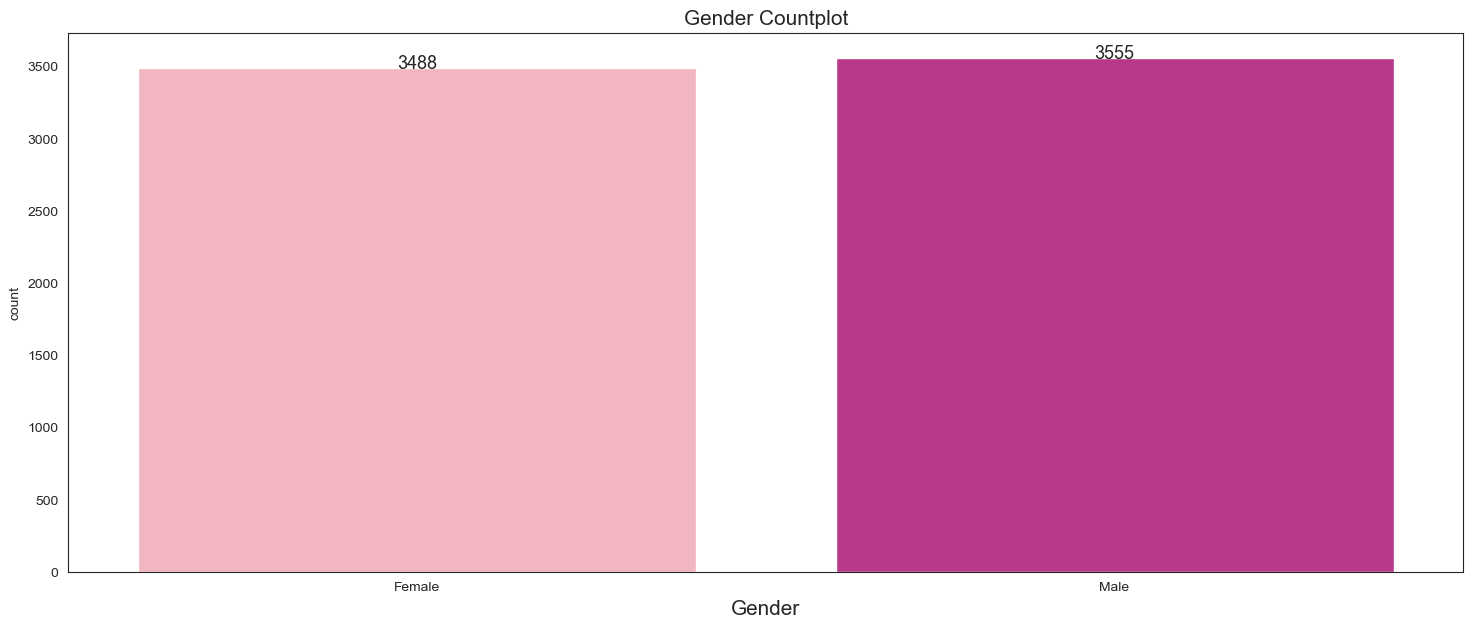

In [528]:
countplot(dataframe=churn_df,column="Gender",palette=random.choice(palette_values))

We see that there are equal number of male and female in our data. As a result, the two groups are represented equally in order to comprehend their general behaviour toward Telco.

In [529]:
## Count Plot based on Age

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



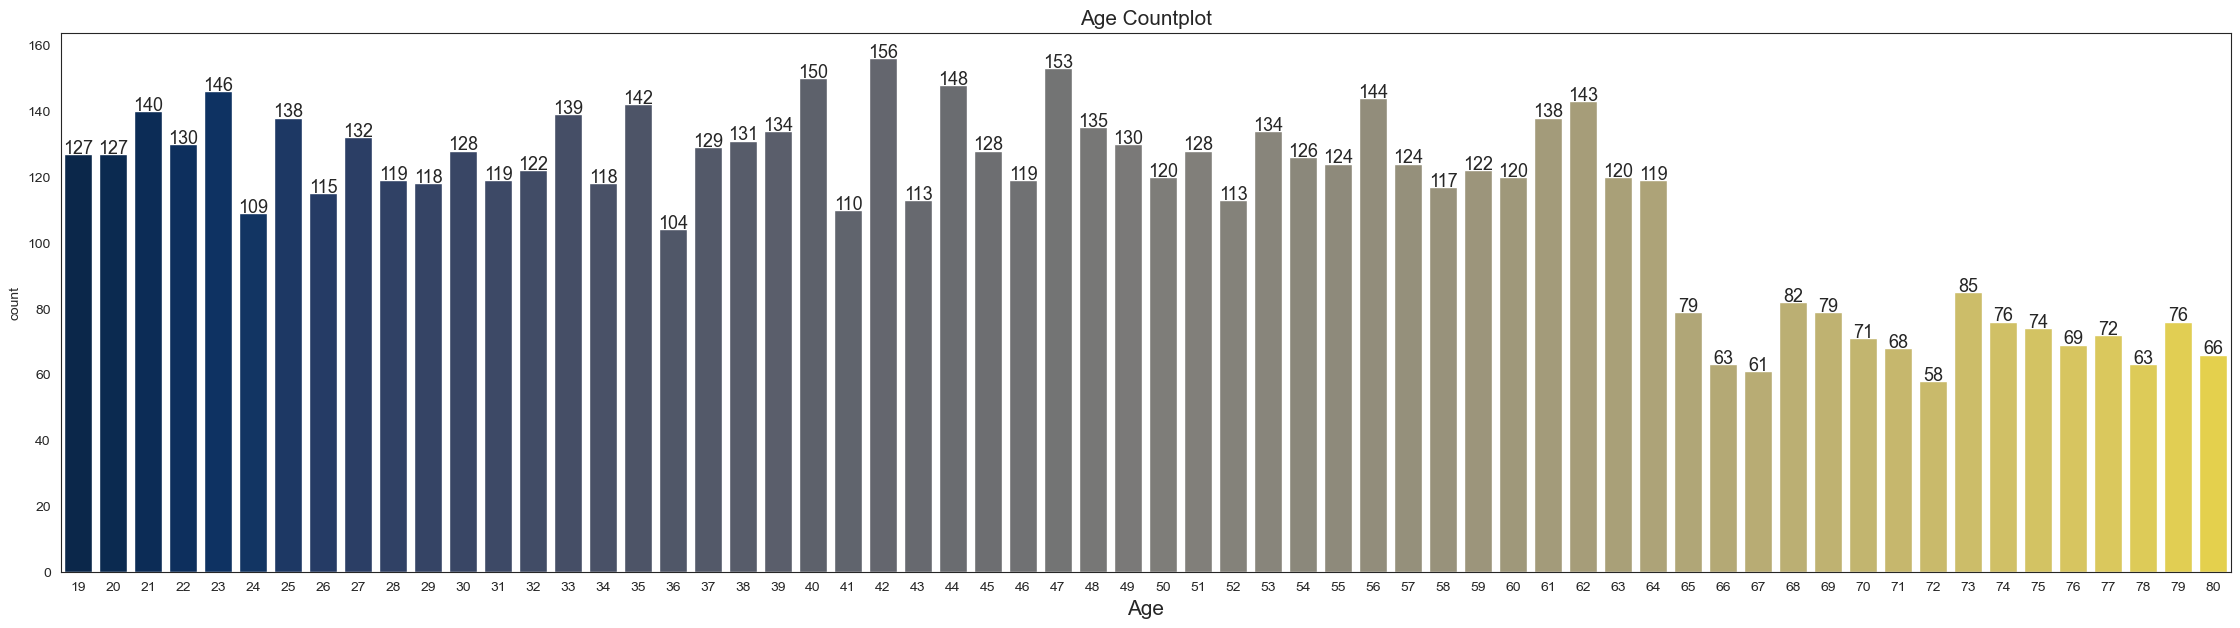

In [530]:
countplot(dataframe=churn_df,column="Age",figsize=(28,7),palette=random.choice(palette_values))

As we saw in age column, there is age bracket starting from minimum 19 to 80 maximum. Therefore we can conclude that there Telco company is providing their services to above 18+ i.e. *adult*

In [531]:
## Countplot graph based on marital status

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



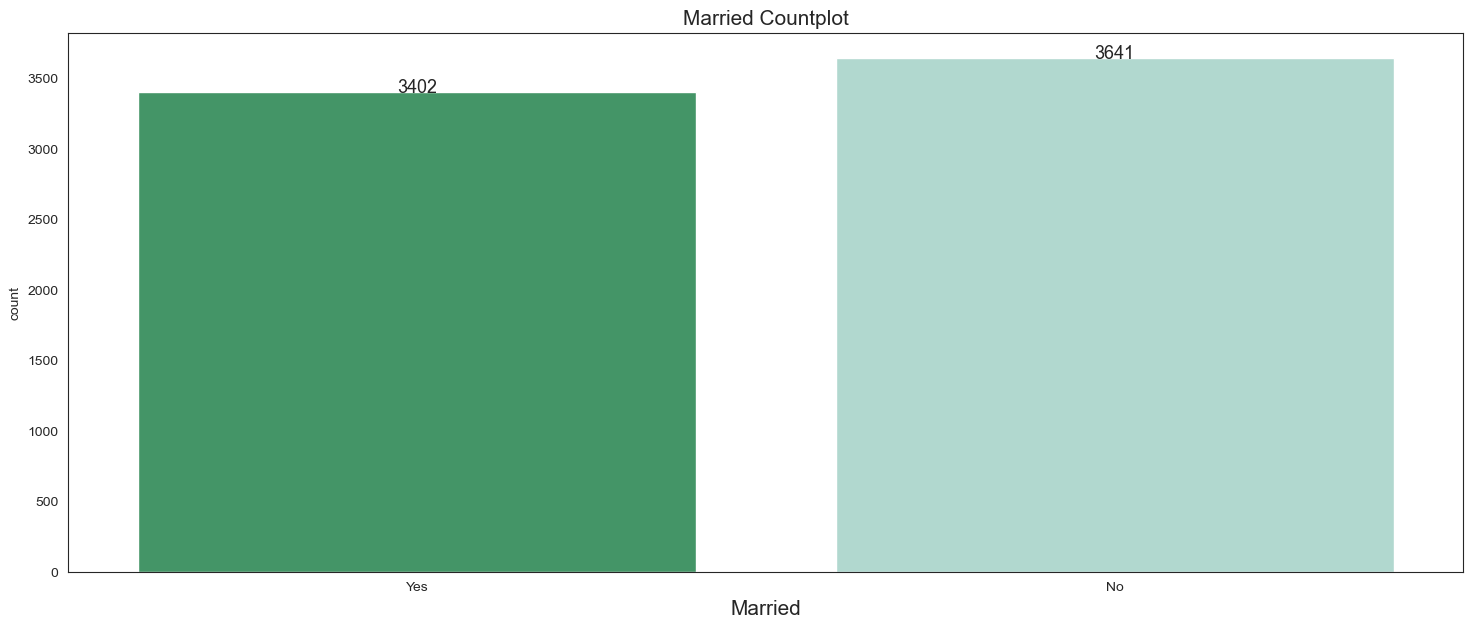

In [532]:
countplot(dataframe=churn_df,column="Married",palette=random.choice(palette_values))

There are a greater number of people who do not have partners than those who do.


In [533]:
# Bar chart for number of customers in each city in ascending order

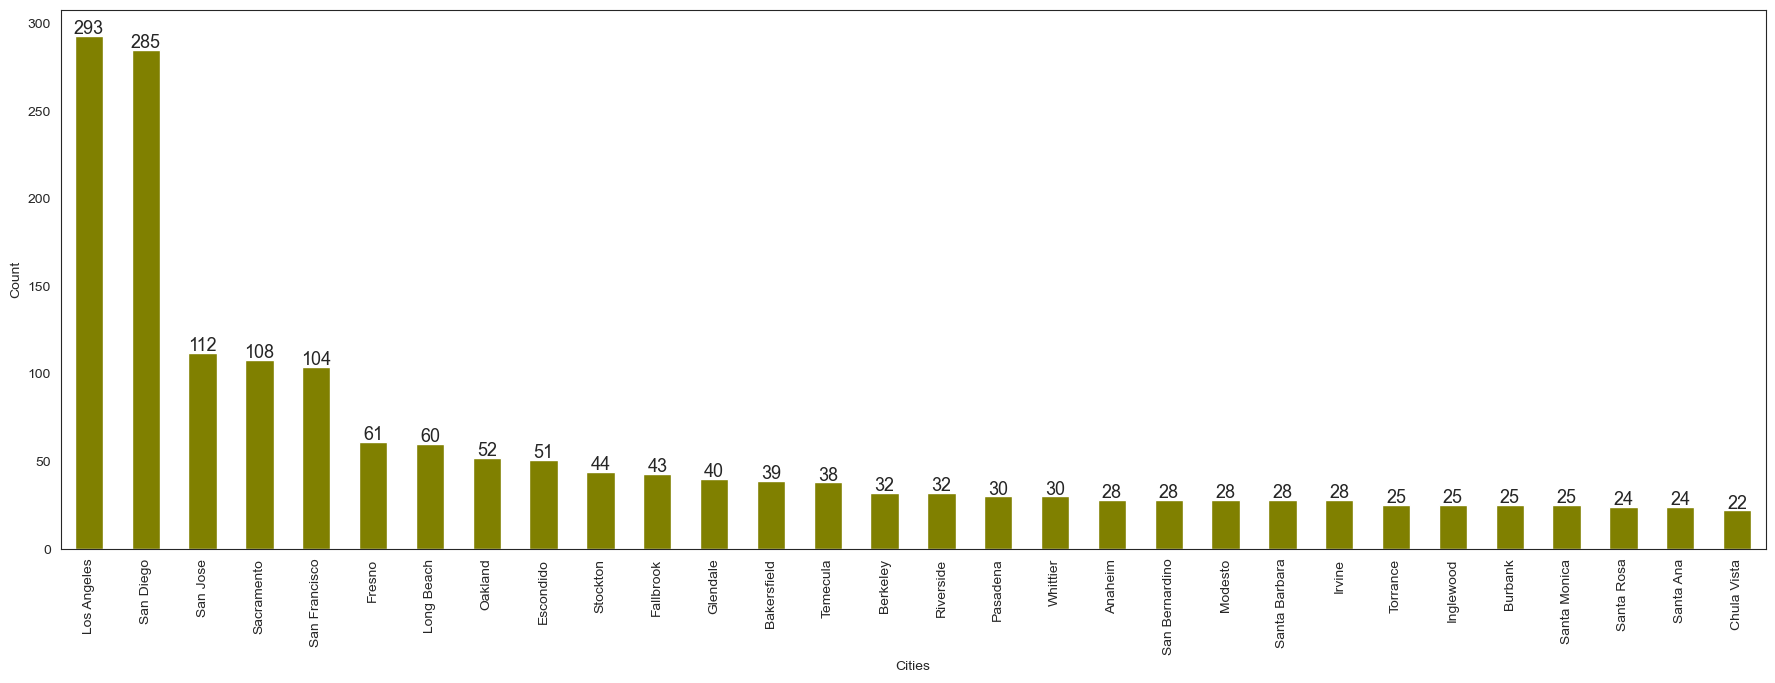

In [534]:
sns.set_style("white")
countplt, ax = plt.subplots(figsize = (22,7))
churn_df["City"].value_counts()[:30].sort_values(ascending=False).plot(kind='bar',color="olive")
plt.xlabel("Cities")
plt.ylabel("Count")
for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 1,rect.get_height(),horizontalalignment='center', fontsize = 13)
plt.show()

Los Angeles & San Diego are the top cities in the california state, so we have to further look ito it whether how the custome behave churn and services wise.

In [535]:
# Countplot graphs for Offers

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



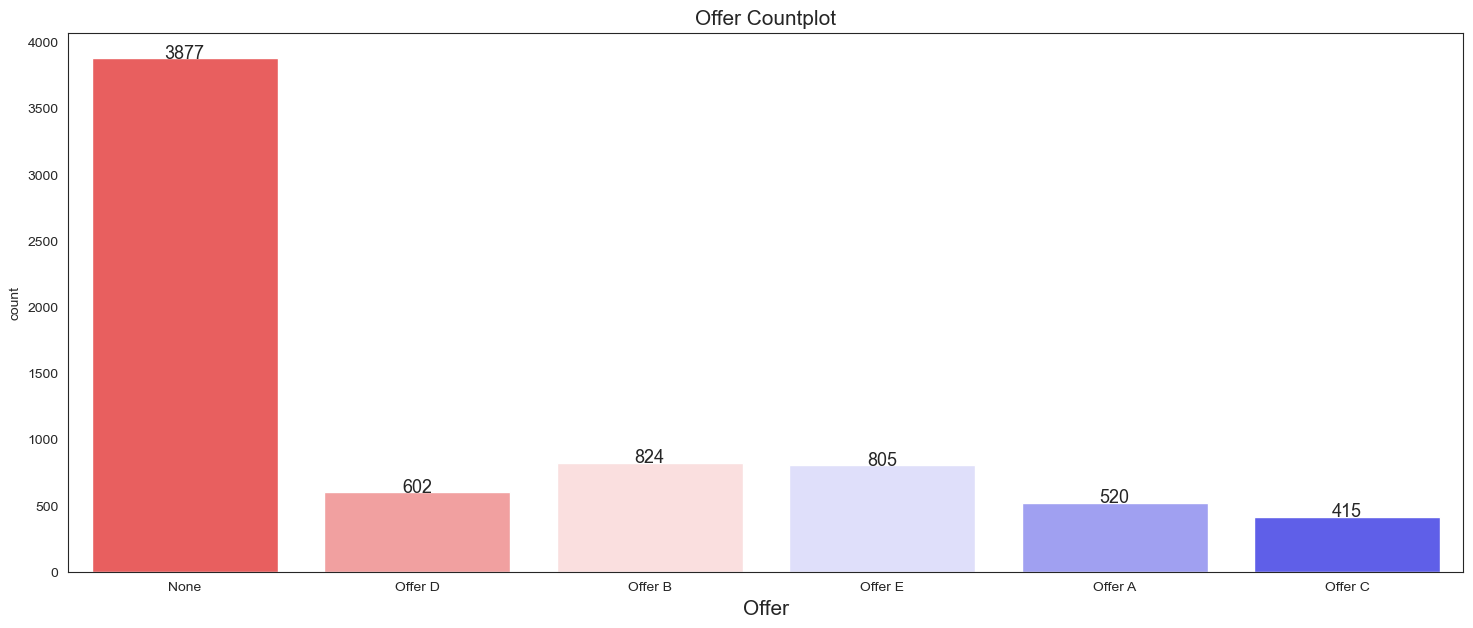

In [536]:
countplot(dataframe=churn_df,column="Offer",palette=random.choice(palette_values))

Overall, all customers are not interested in any offer.

In [537]:
# Countplot on Offers just on Churned customers

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



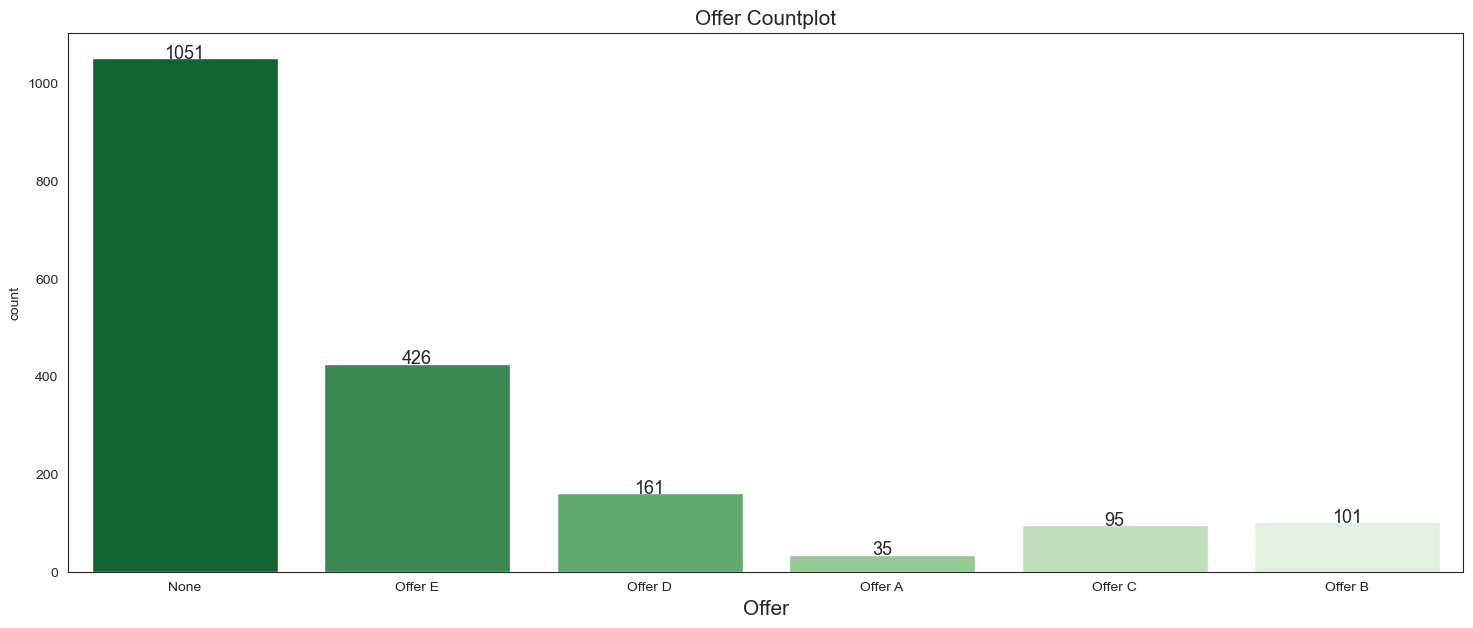

In [538]:
countplot(dataframe=churned,column="Offer",palette=random.choice(palette_values))

Churned customers are not interested in any offers.But apart from that many churned customers beleive in offer E.

In [539]:
# Countplot for Offers data based on Not churned data

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



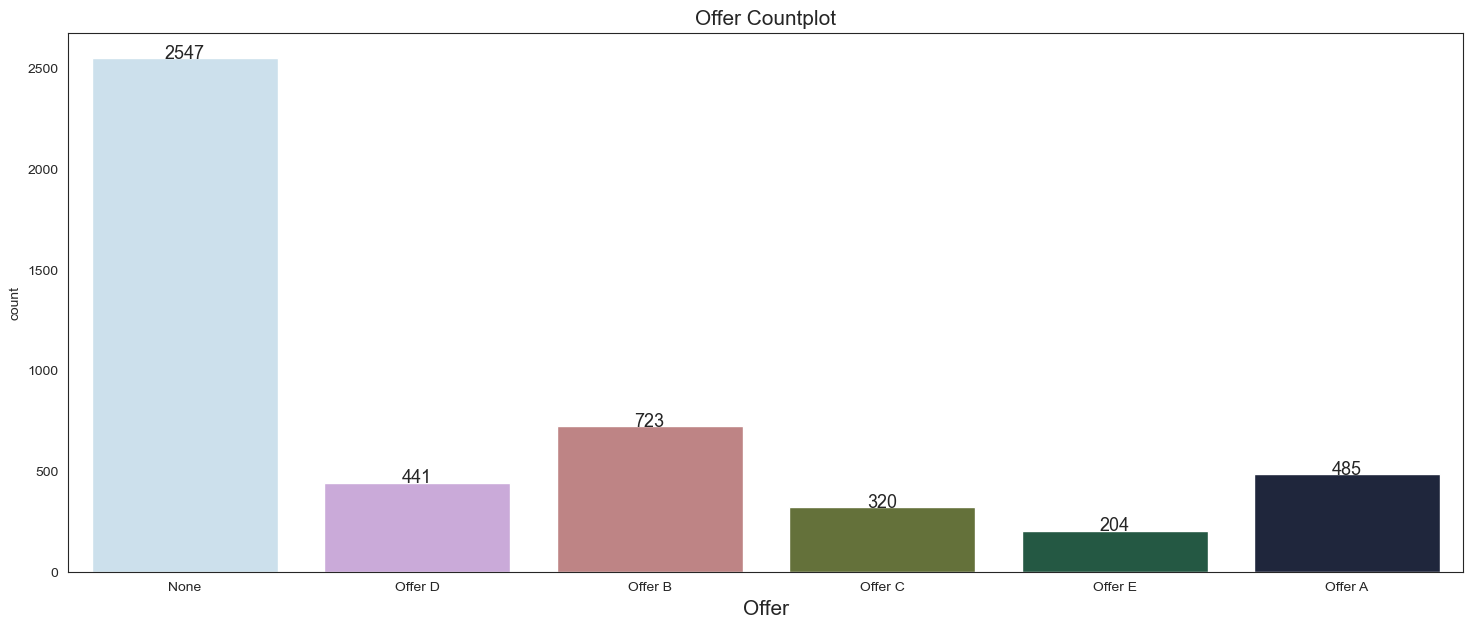

In [540]:
countplot(dataframe=not_churned,column="Offer",palette=random.choice(palette_values))

Customers who  stayed, they are more inclined towards Offer B, and Offer A. Offers in general didn't contribute to the decision of staying or leaving


In [541]:
# Countplot graph for customers using phone service

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



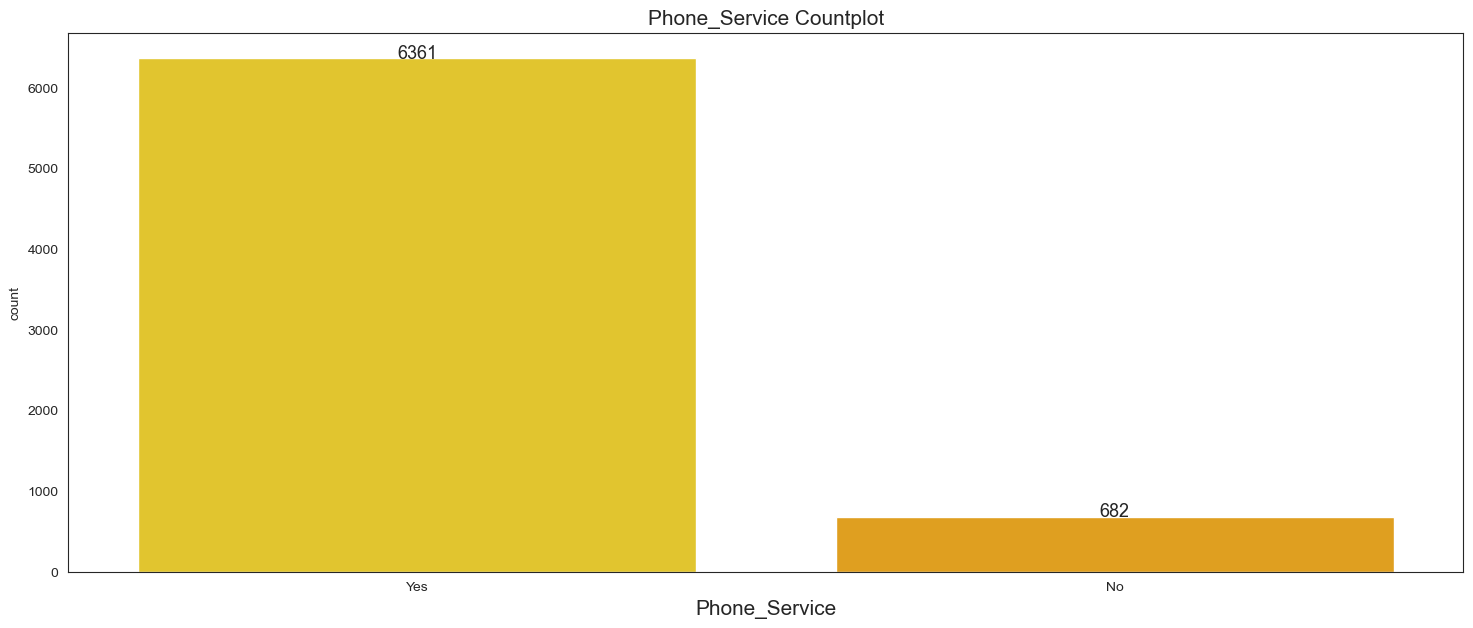

In [542]:
countplot(dataframe=churn_df,column="Phone_Service",palette=random.choice(palette_values))

There are much customer around 6361 who have phone services in their home.


In [543]:
# Count plot for people using multiple lines

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



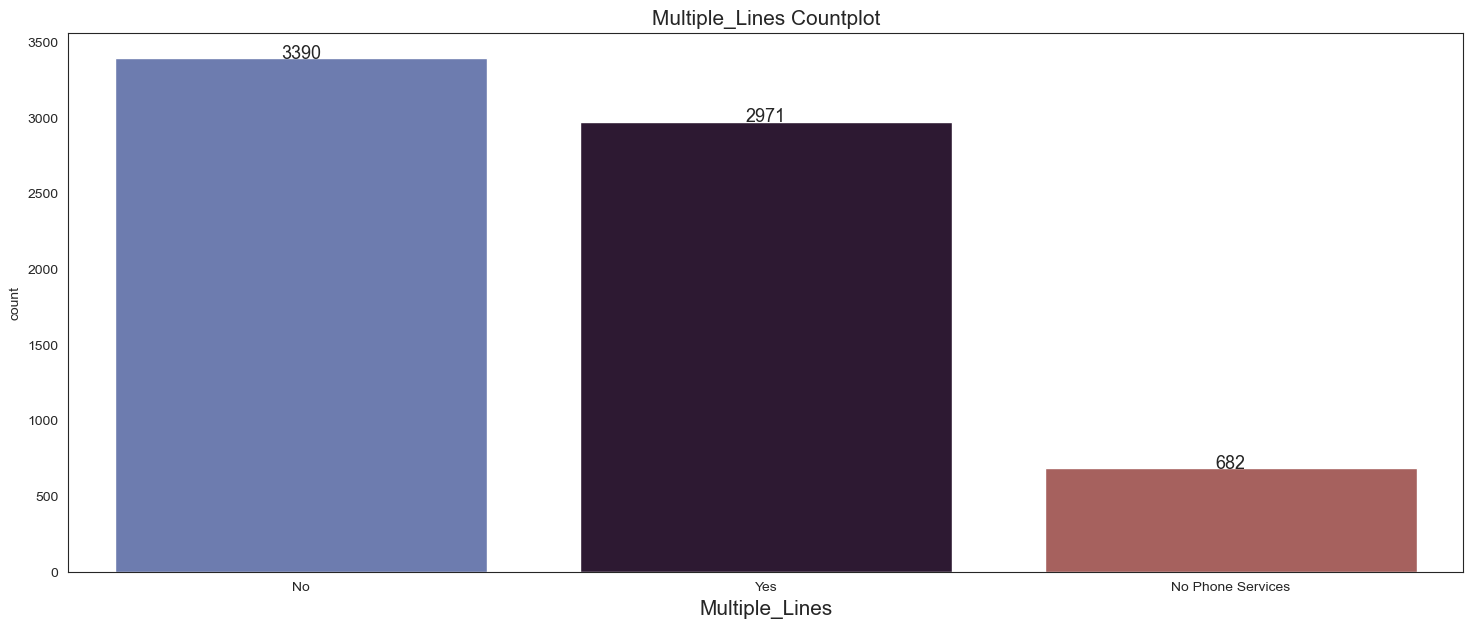

In [544]:
countplot(dataframe=churn_df,column="Multiple_Lines",palette=random.choice(palette_values))

The majority of the local customers (3390+682=4072) don't have more than one phone line in their residence.

In [545]:
# Count plot graph for people using internet service

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



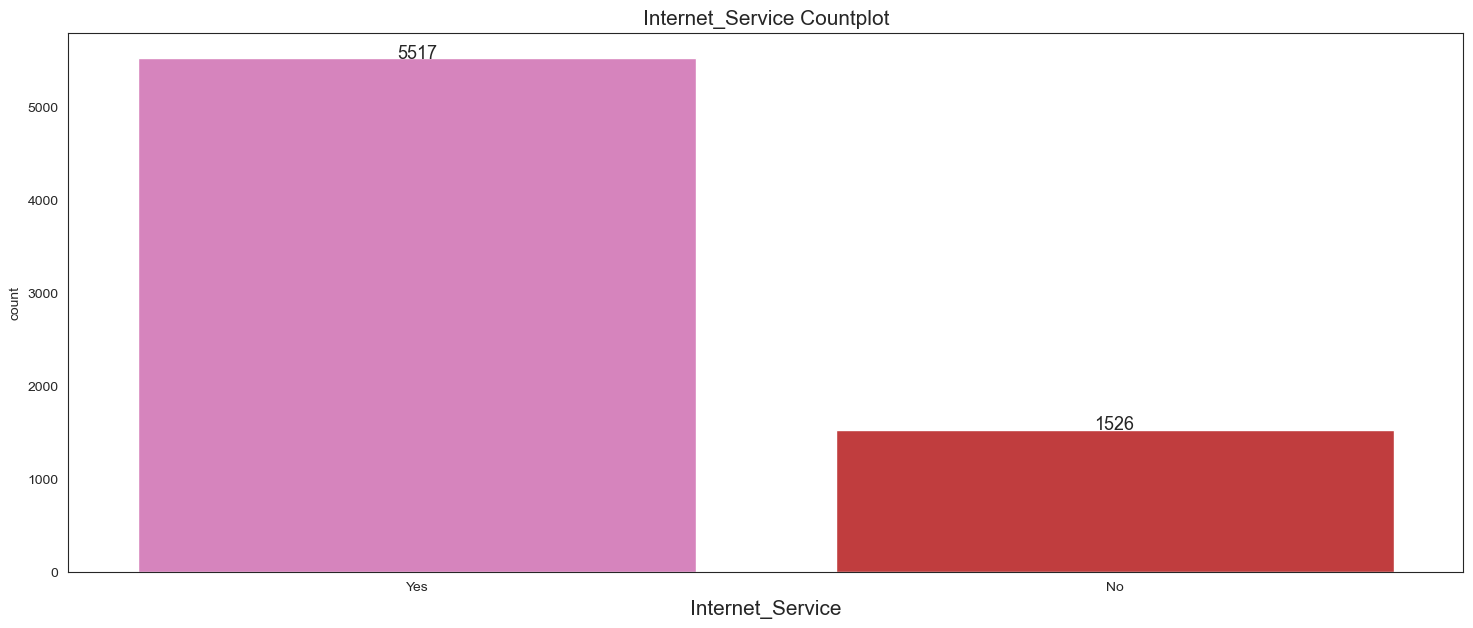

In [546]:
countplot(dataframe=churn_df,column="Internet_Service",palette=random.choice(palette_values))

Majority of the customer have internet on their home.

In [547]:
# Count plot graph showing different types of internet service

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



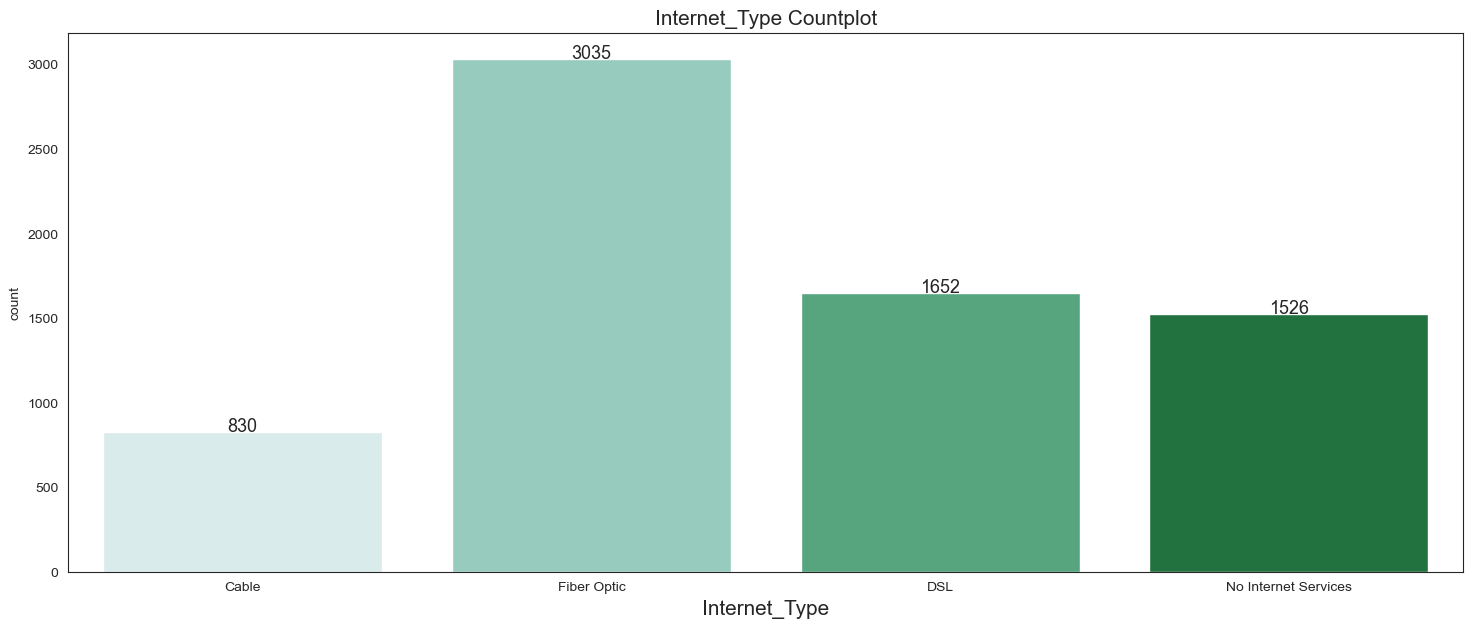

In [548]:
countplot(dataframe=churn_df,column="Internet_Type",palette=random.choice(palette_values))

Customer prefer Fiber Optic internet on their home rather than cable.

In [549]:
# Count plot graph showing length of contracts and people with month to month contract

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



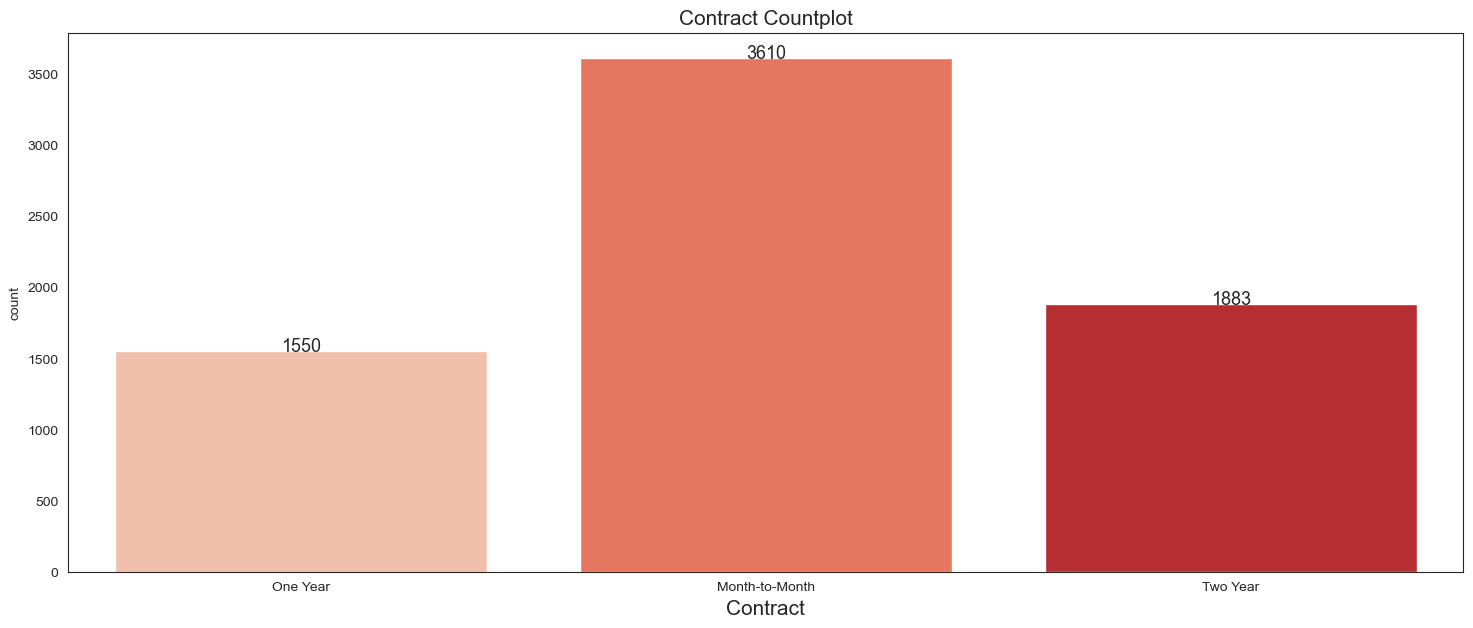

In [550]:
countplot(dataframe=churn_df,column="Contract",palette=random.choice(palette_values))

The customer selects a month-to-month agreement with the Teleco company.

In [551]:
# Graph showing number of people who have opted for paperless billing

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



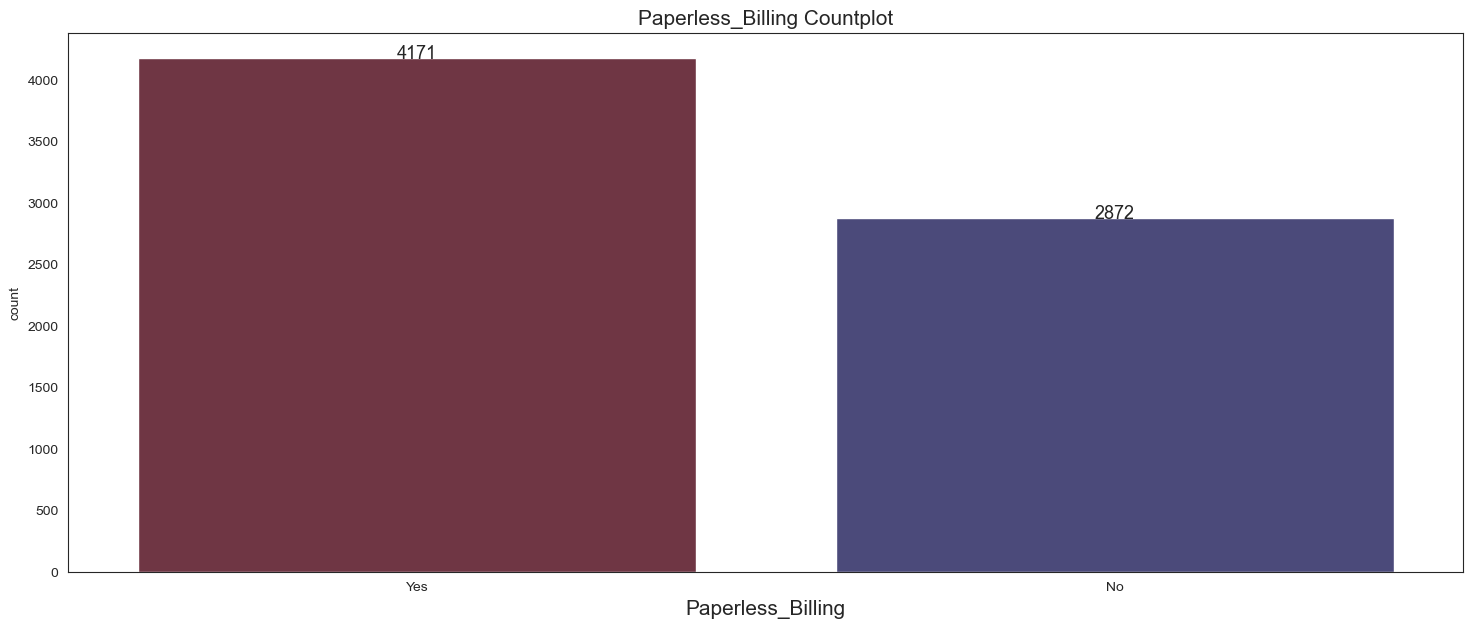

In [552]:
countplot(dataframe=churn_df,column="Paperless_Billing",palette=random.choice(palette_values))

According to a graph, the majority of clients pay their fees online rather than on paper.

In [553]:
#Grpah showing the payment method preference for customers

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



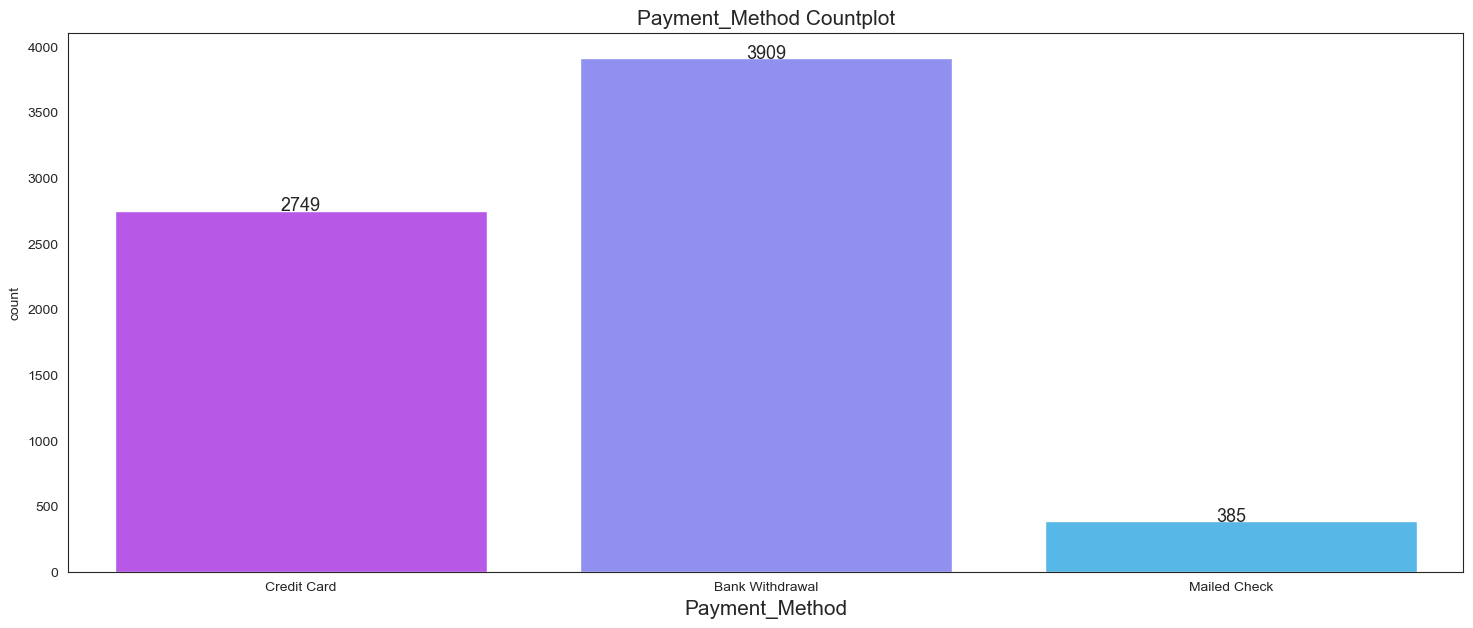

In [554]:
countplot(dataframe=churn_df,column="Payment_Method",palette=random.choice(palette_values))

As opposed to using a credit card, customers significantly prefer to pay their fees by bank withdrawal.

In [555]:
# Graph showing Customer churn status

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



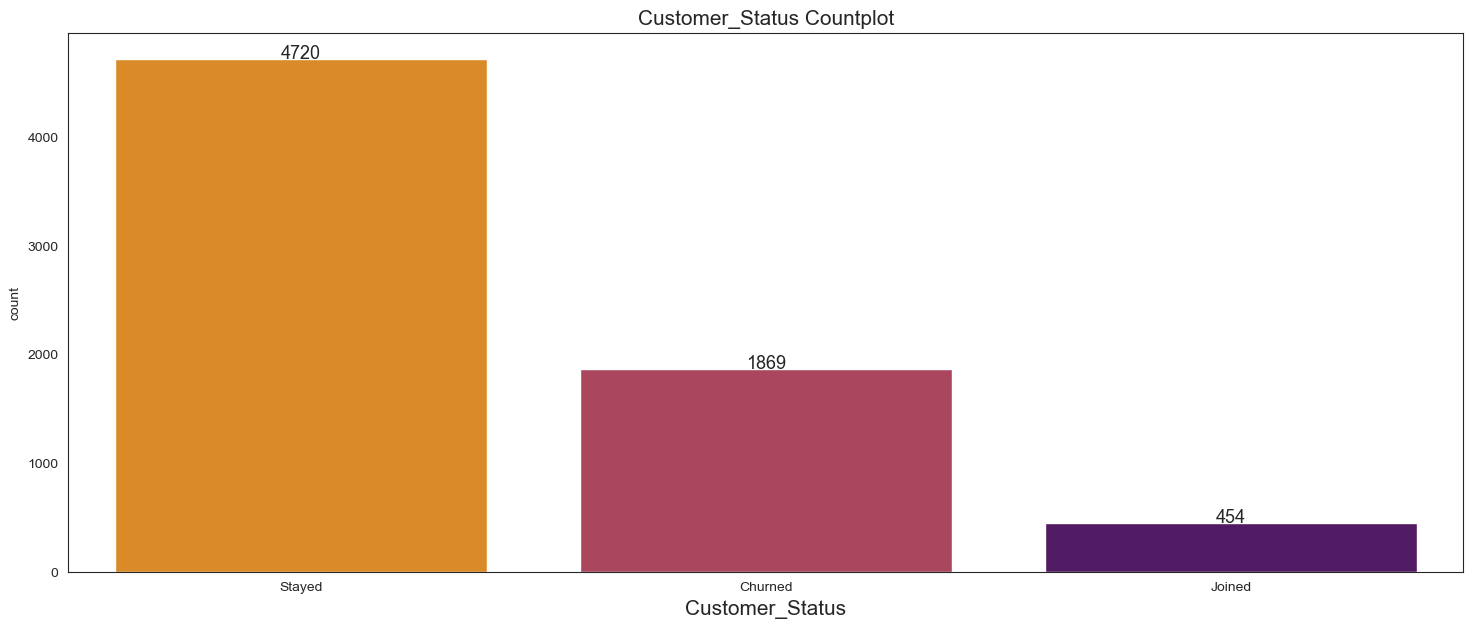

In [556]:
countplot(dataframe=churn_df,column="Customer_Status",palette=random.choice(palette_values))

Now, it's critical to keep track of the overall number of consumers who have churned (left the service) after a specific amount of time. We note that a big proportion of our clients did not abandon the services.  Therefore, we may move on to the data that chose to churn.



In [557]:
# Graph to plot reason for churn (Category)

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



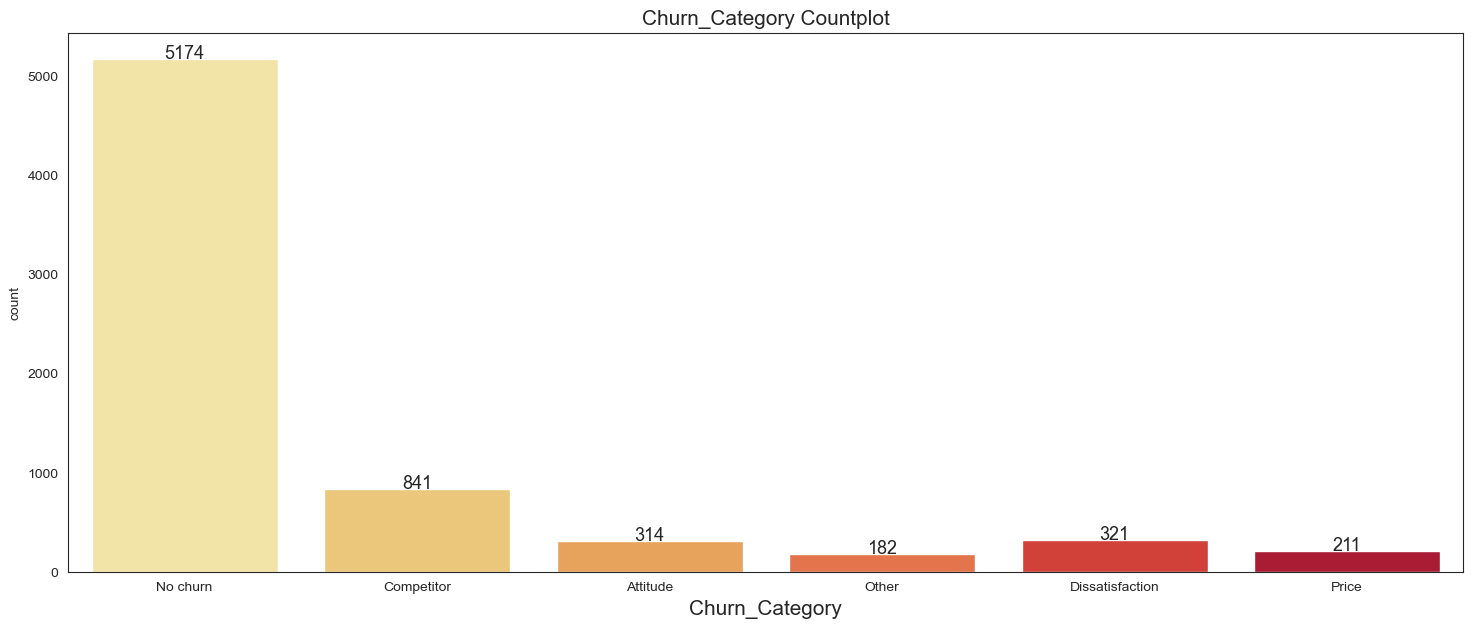

In [558]:
countplot(dataframe=churn_df,column="Churn_Category",palette=random.choice(palette_values))

As we exclude the customer who dont have churned, from now we can conclude that Competitor is one of the main reason churn.

In [559]:
# Bar Chart showing various reasons customers are leaving Telco

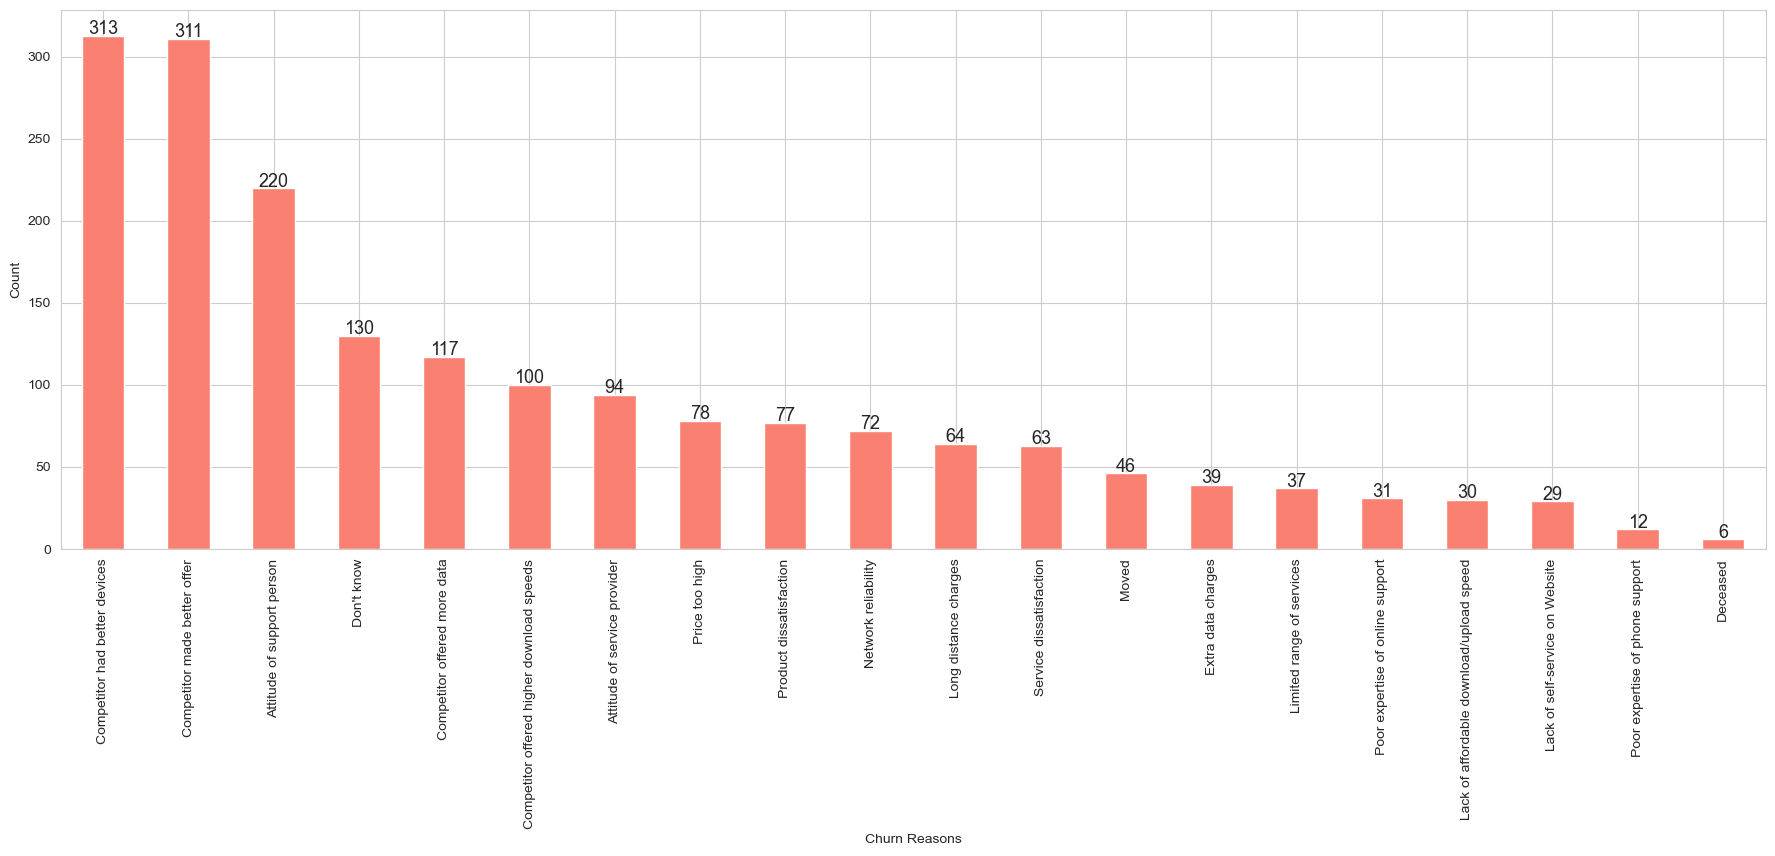

In [560]:
sns.set_style("whitegrid")
countplt, ax = plt.subplots(figsize = (22,7))
churn_df["Churn_Reason"].value_counts()[1:].sort_values(ascending=False).plot(kind='bar',color="salmon")
plt.xlabel("Churn Reasons")
plt.ylabel("Count")
for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 1,rect.get_height(),horizontalalignment='center', fontsize = 13)
plt.show()

### What was the customer churn and retention rate?

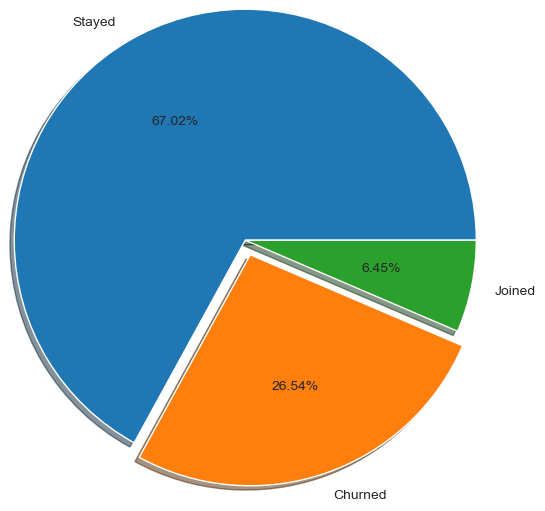

In [561]:
plt.figure(figsize=(10,5))
plt.pie(churn_df['Customer_Status'].value_counts(), labels=churn_df['Customer_Status'].unique(), autopct='%.2f%%',explode=[0,0.1,0],radius=1.5,shadow=True)
plt.show()


We note that a big proportion of our clients did not abandon the services. Therefore, only **26.54% (1869)** of the customers was churned.

**Churn Rate**= 1869/7043 = 26.54%

Retention Rate = 1 - Churn Rate = 100 - 26.54 = 73.46%

### What was the customer churn pattern according to Gender?

In [562]:
def countplots(dataframe, column, figsize = (18, 7),palette = random.choice(palette_values),hue=None):
    countplt, ax = plt.subplots(figsize = figsize)
    sns.countplot(dataframe[column],palette=palette,hue=dataframe[hue])
    plt.title("{} Countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 15)
    for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 13)
    plt.show()




/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



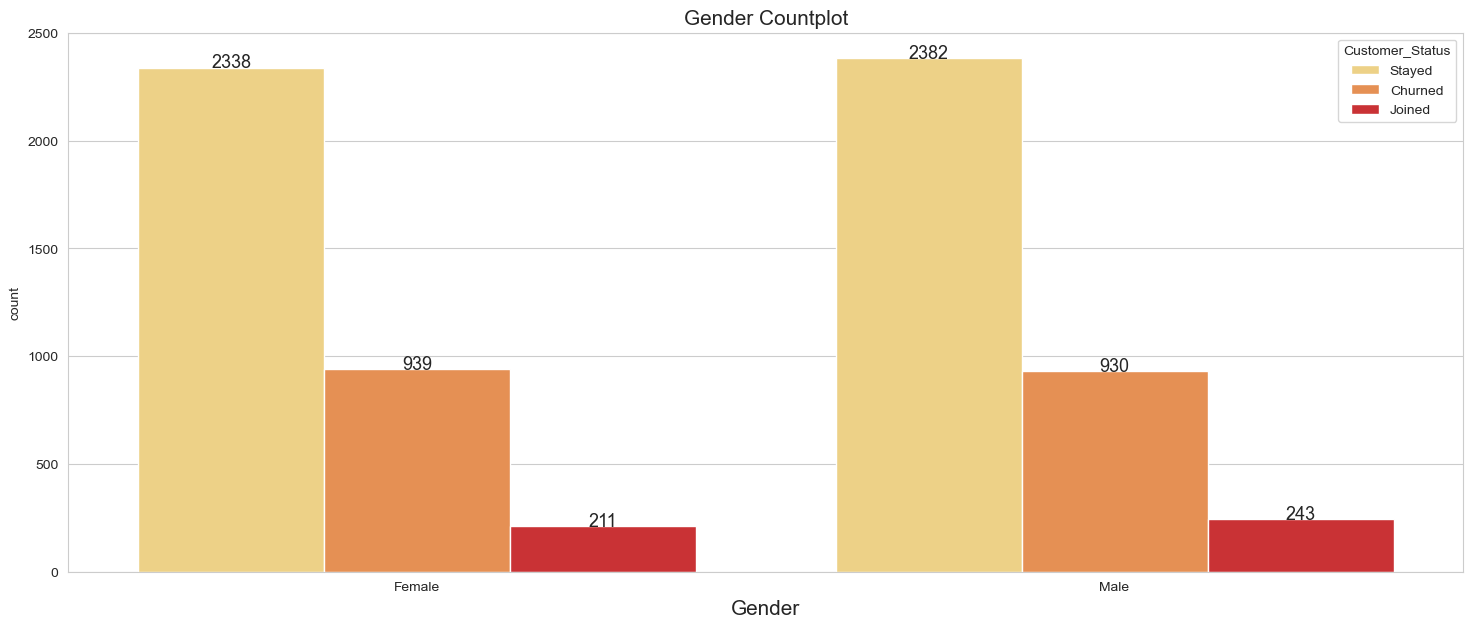

In [563]:
countplots(dataframe=churn_df,column="Gender",hue="Customer_Status")

From the chart we can surely depict that same number of both genders were moved toward attrition.

### What was the behaviour of churn customers with age?

In [564]:
df_g = churn_df.groupby(['Age', 'Customer_Status']).size().reset_index()
df_g['percentage'] = churn_df.groupby(['Age', 'Customer_Status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['Age', 'Customer_Status', 'Counts', 'Percentage']

fig=px.bar(df_g, x='Age', y='Counts', color='Customer_Status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(
    autosize=True,width=1500,height=600)

In [565]:
churn_df.City.nunique()

1106

According to the graph, interest in telecommunications services declines after the age of 65, and California has a high attrition rate across the board.

### Which city has the most and least churn rate in California state?

In [566]:
ch_city = churned.groupby(['City', 'Customer_Status']).size().sort_values(ascending=False).reset_index()[:30]
ch_city

,City,Customer_Status,0
0,San Diego,Churned,185
1,Los Angeles,Churned,78
2,San Francisco,Churned,31
3,San Jose,Churned,29
4,Fallbrook,Churned,26
5,Sacramento,Churned,26
6,Temecula,Churned,22
7,Escondido,Churned,16
8,Long Beach,Churned,15
9,Oakland,Churned,13


In [567]:
ch_city = churned.groupby(['City', 'Customer_Status']).size().sort_values(ascending=False).reset_index()[:30]
ch_city.columns = ['City', 'Customer_Status', 'Counts']

fig=px.bar(ch_city, x='City', y='Counts', color='Customer_Status')
fig.update_layout(
    autosize=True)
fig.update_traces(marker_color='red')

In [568]:
no_ch_city = not_churned.groupby(['City', 'Customer_Status']).size().sort_values(ascending=False).reset_index()[:30]
no_ch_city.columns = ['City', 'Customer_Status', 'Counts']

fig=px.bar(no_ch_city, x='City', y='Counts', color='Customer_Status')
fig.update_layout(
    autosize=True)
fig.update_traces(marker_color='green')

In [569]:
least_ch=len(churned[churned["Customer_Status"]=="Churned"]["City"].value_counts() == 1)
least_ch

777

From the above both graphs, we can surely depicted that San Diego is the most prominent churned city. Around 777 are the most low churn cities.

### How many new clients did the business welcome in the most recent quarter? How much more from there?

In [570]:
newly_join.shape

(454, 39)

In [571]:
new_city = newly_join.groupby(['City', 'Customer_Status']).size().sort_values(ascending=False).reset_index()[:30]
new_city.columns = ['City', 'Customer_Status', 'Counts']

fig=px.bar(new_city, x='City', y='Counts', color='Customer_Status')
fig.update_layout(
    autosize=True)
fig.update_traces(marker_color='lightgreen')

It is shown that Los Angeles is the most demanding city where new customers are newly joined. On the other side second one is San Francisco and San Diego.

### Which city has the most and least phone/internet churn rate in California state?

In [572]:
most_churn_internet_cities=churned.loc[churned["Internet_Service"]=="Yes"]

In [573]:
most_int=most_churn_internet_cities["City"].value_counts().head(5)


In [574]:
fig = px.pie(most_int, values='City', names=most_int.index, color_discrete_sequence=px.colors.sequential.RdBu,labels={'index':'name'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [575]:
least_int=len(churned[churned["Internet_Service"]=="Yes"]["City"].value_counts() == 1)
least_int

740

In [576]:
most_churn_phone_cities=churned.loc[churned["Phone_Service"]=="Yes"]

In [577]:
most_phone=most_churn_phone_cities["City"].value_counts().head(5)


In [578]:
fig = px.pie(most_phone, values='City', names=most_phone.index, color_discrete_sequence=px.colors.sequential.Magma,labels={'index':'name'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [579]:
least_phone=len(churned[churned["Phone_Service"]=="Yes"]["City"].value_counts() == 1)
least_phone

736

Both San Diego and Los Angeles provide their customers both services, whether we are talking about the best or the worst.

### Which internet services are people utilising the most frequently? Where?




/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



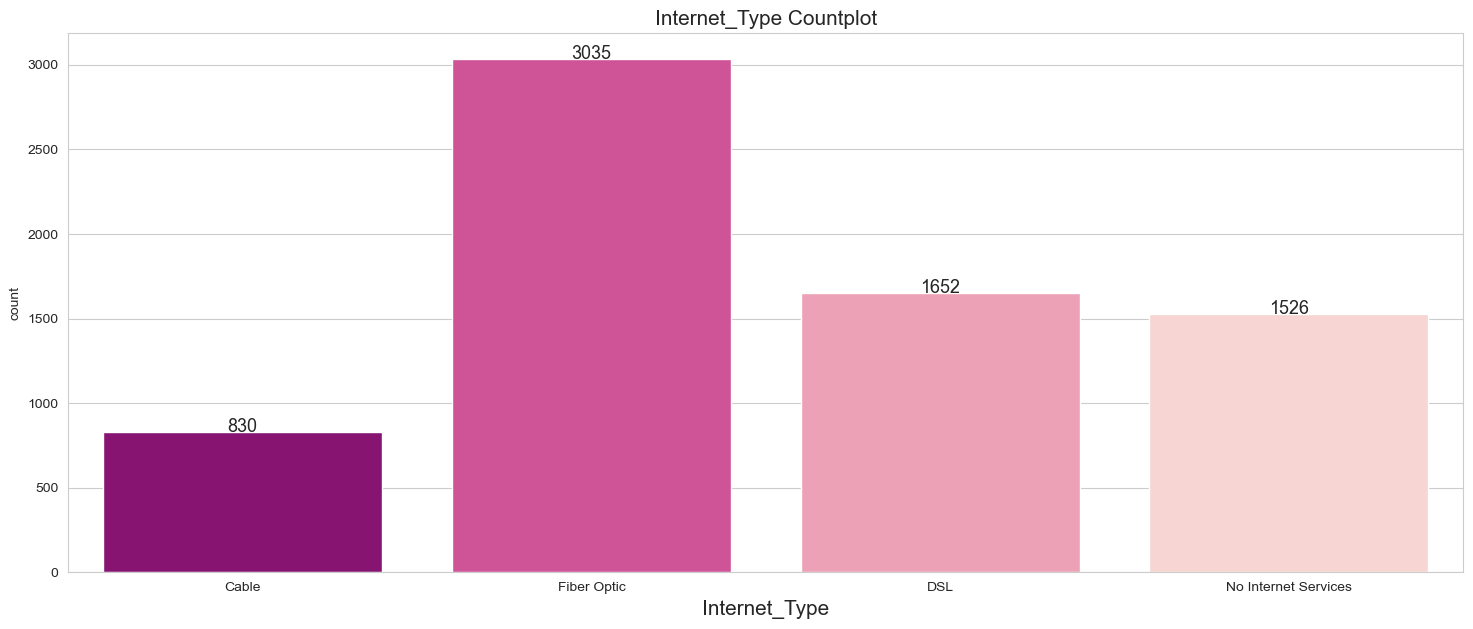

In [580]:
countplot(dataframe=churn_df,column="Internet_Type",palette=random.choice(palette_values))

In [581]:
df_g = churn_df.groupby(['Internet_Type', 'Customer_Status']).size().reset_index()
df_g['Percentage'] = churn_df.groupby(['Internet_Type', 'Customer_Status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['Internet_Type', 'Customer_Status', 'Counts', 'Percentage']

fig=px.bar(df_g, x='Internet_Type', y='Counts', color='Customer_Status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(
    autosize=True,width=1500,height=600)

Fiber Optic is the leading internet service around 41% (3035 customers) of the revenue is generated by this service, where as churn rate is almost equal to that.

In [582]:
df_g = churned.groupby(['Internet_Type', 'City']).size().sort_values(ascending=False).reset_index()[:30]
df_g.columns = ['Internet_Type', 'City', 'Counts']
fig=px.bar(df_g, x='City', y='Counts', color='Internet_Type')
fig.update_layout(
    autosize=True)

Fiber Optics is making a name for itself in San Diego and Los Angeles.

### What are the type of contracts that contributes the customer churn? And which city are up on the board?

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



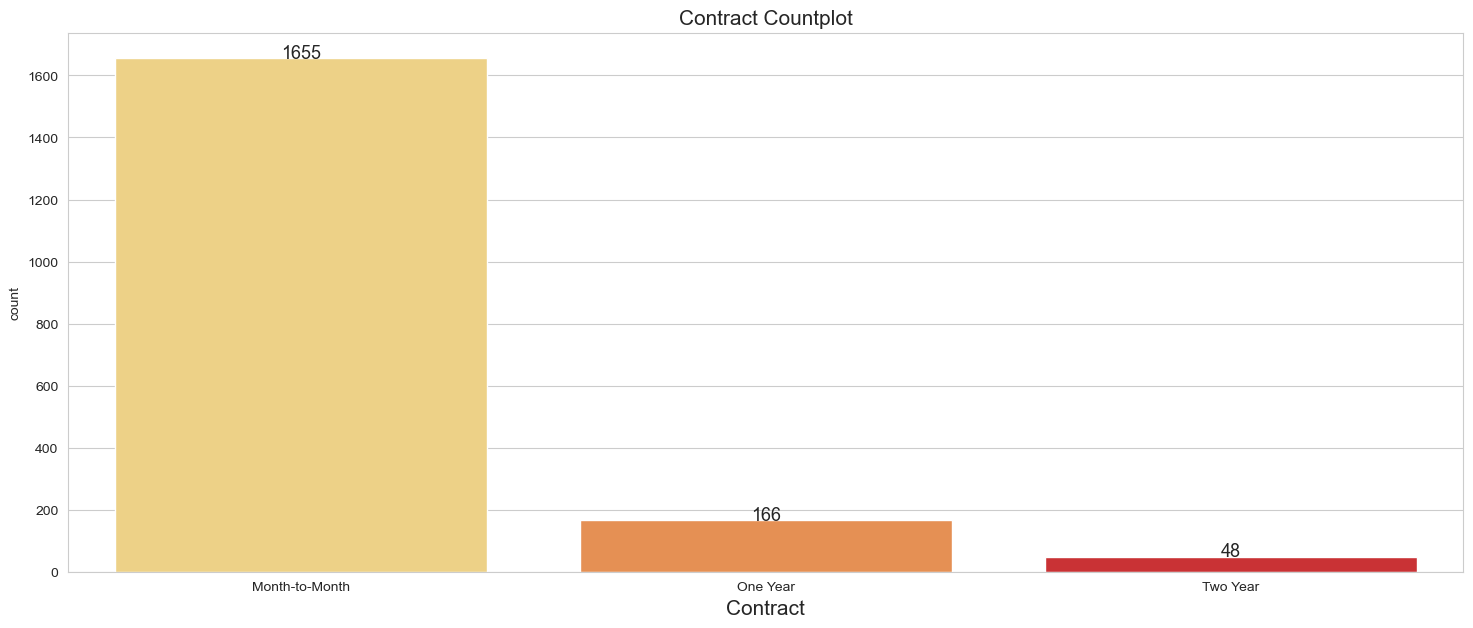

In [583]:
countplot(dataframe=churned,column="Contract",palette=random.choice(palette_values))

Customers can conveniently pay their costs under month-to-month contracts.

In [584]:
df_g = churn_df.groupby(['Contract', 'Customer_Status']).size().reset_index()
df_g['Percentage'] = churn_df.groupby(['Contract', 'Customer_Status']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['Contract', 'Customer_Status', 'Counts', 'Percentage']

fig=px.bar(df_g, x='Contract', y='Counts', color='Customer_Status', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(
    autosize=True,width=1500,height=600)

A large percent of customers with monthly subscription have left when compared to customers with one or two years.

In [585]:
df_g = churned.groupby(['Contract', 'City']).size().sort_values(ascending=False).reset_index()[:10]
df_g.columns = ['Contract', 'City', 'Counts']
fig=px.bar(df_g, x='City', y='Counts', color='Contract')
fig.update_layout(
    autosize=True,width=2000,height=700)

The most churn is occurring in large cities.

In [586]:
df_g = churned.groupby(['Contract', 'City']).size().sort_values(ascending=False).reset_index().head(260)
df_g.columns = ['Contract', 'City', 'Counts']
fig=px.bar(df_g, x='City', y='Counts', color='Contract')
fig.update_layout(
    autosize=True,width=2500,height=700)

### What seems to be the key drivers of customer churn?


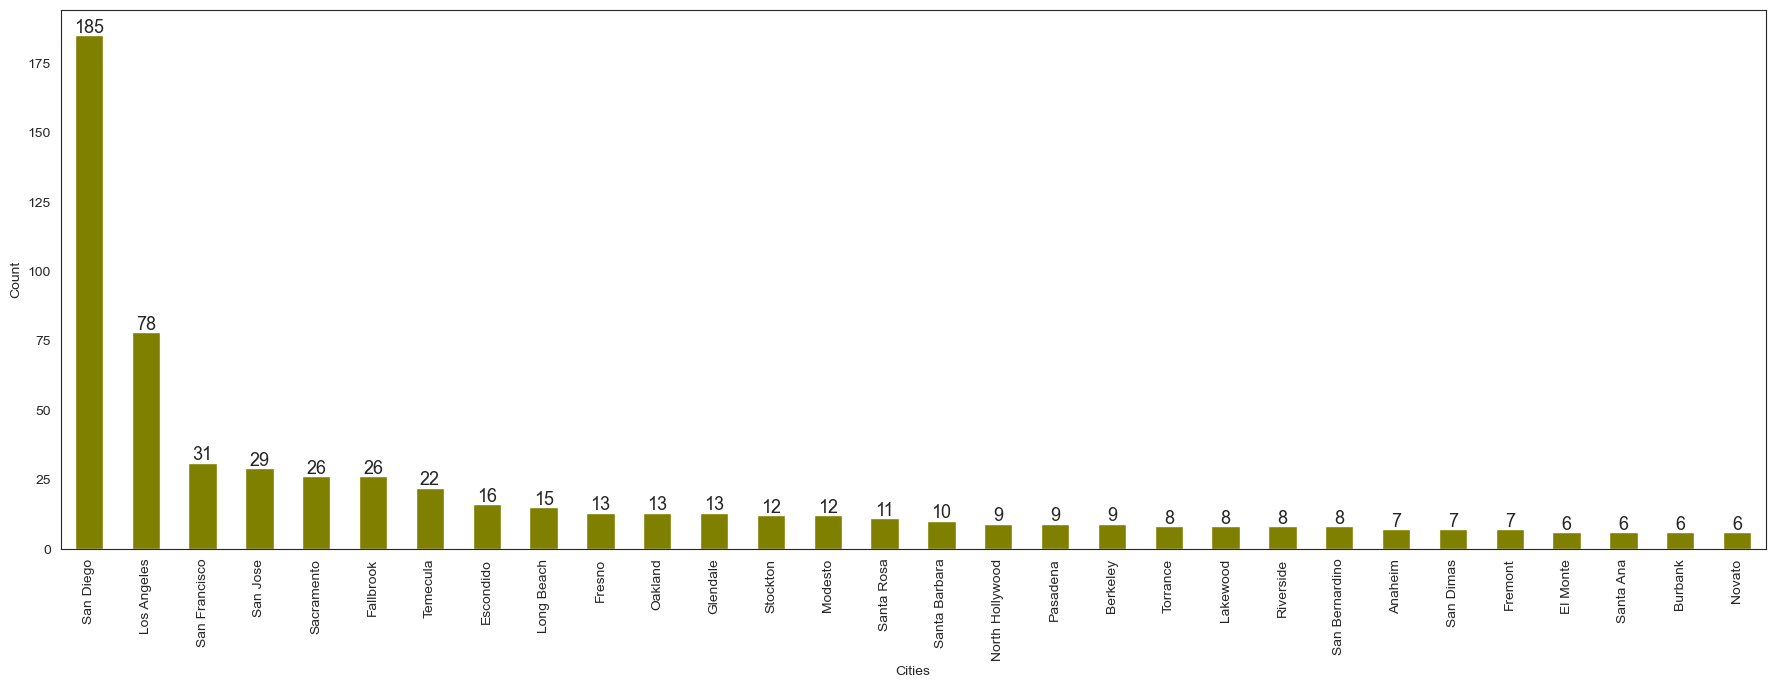

In [587]:
sns.set_style("white")
countplt, ax = plt.subplots(figsize = (22,7))
churned["City"].value_counts()[:30].sort_values(ascending=False).plot(kind='bar',color="olive")
plt.xlabel("Cities")
plt.ylabel("Count")
for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 1,rect.get_height(),horizontalalignment='center', fontsize = 13)
plt.show()

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



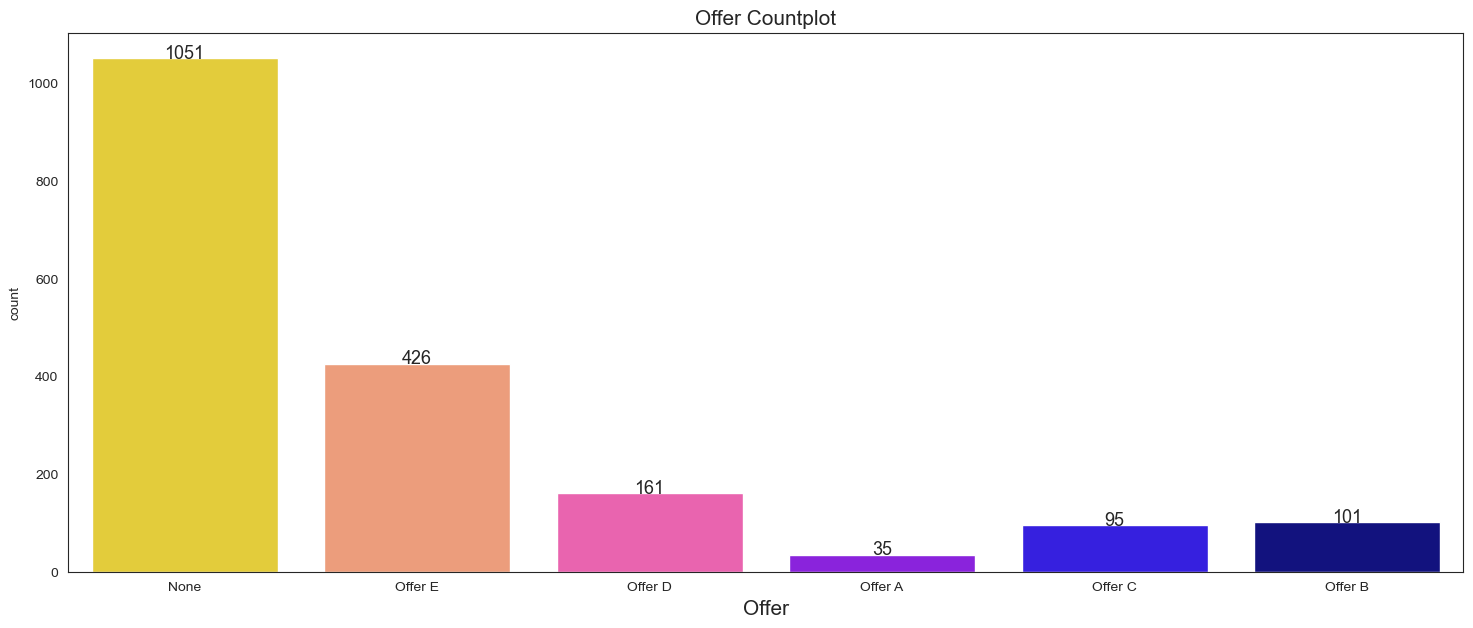

In [588]:
countplot(dataframe=churned,column="Offer",palette=random.choice(palette_values))

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



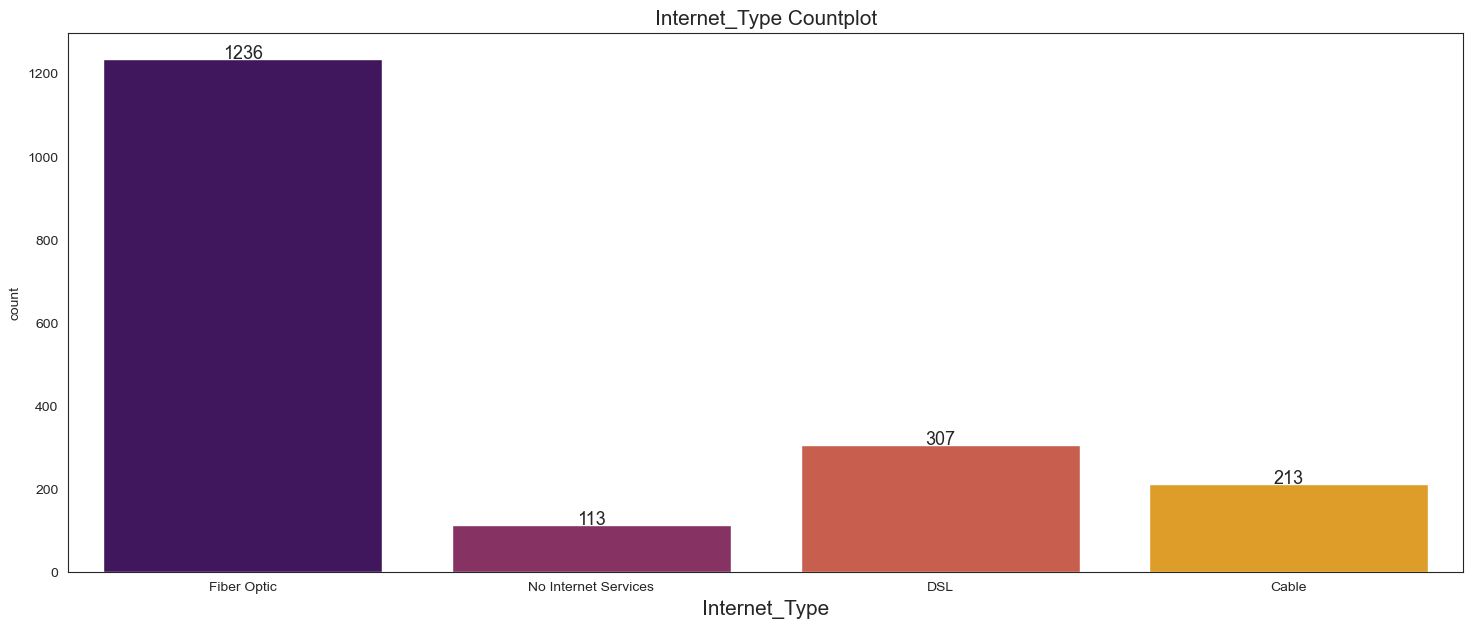

In [589]:
countplot(dataframe=churned,column="Internet_Type",palette=random.choice(palette_values))

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



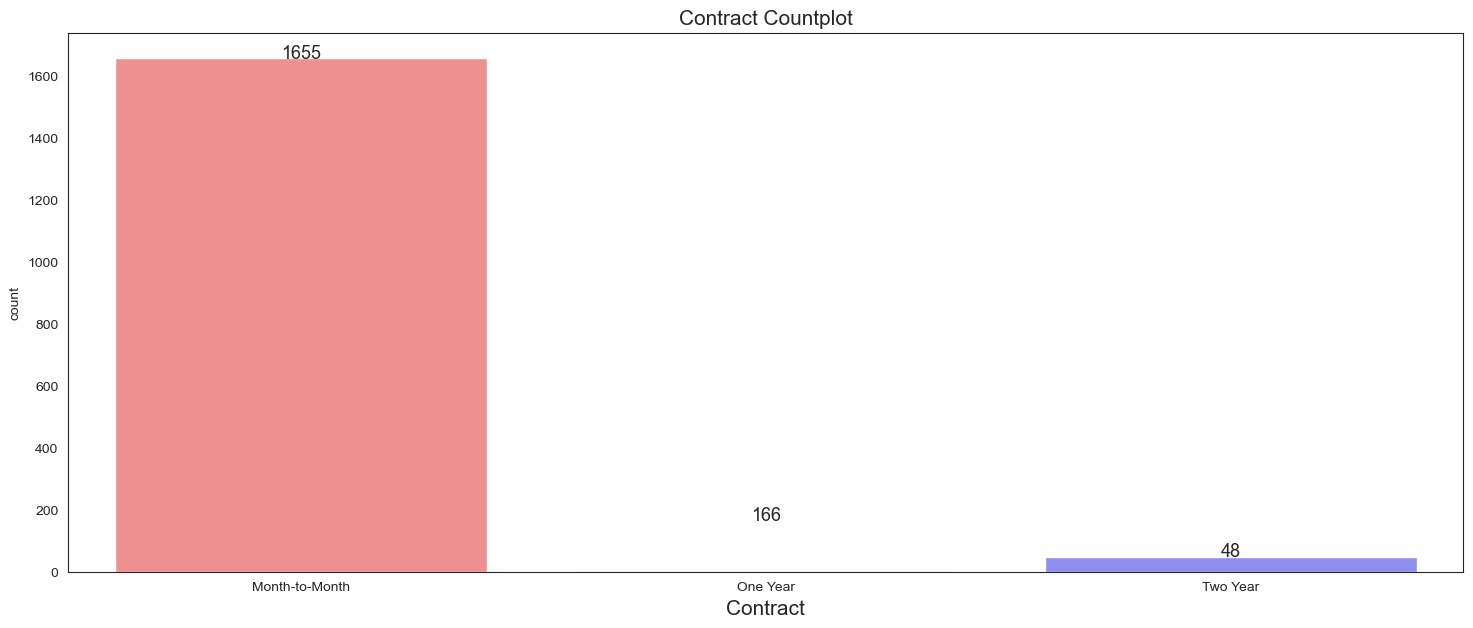

In [590]:
countplot(dataframe=churned,column="Contract",palette=random.choice(palette_values))

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



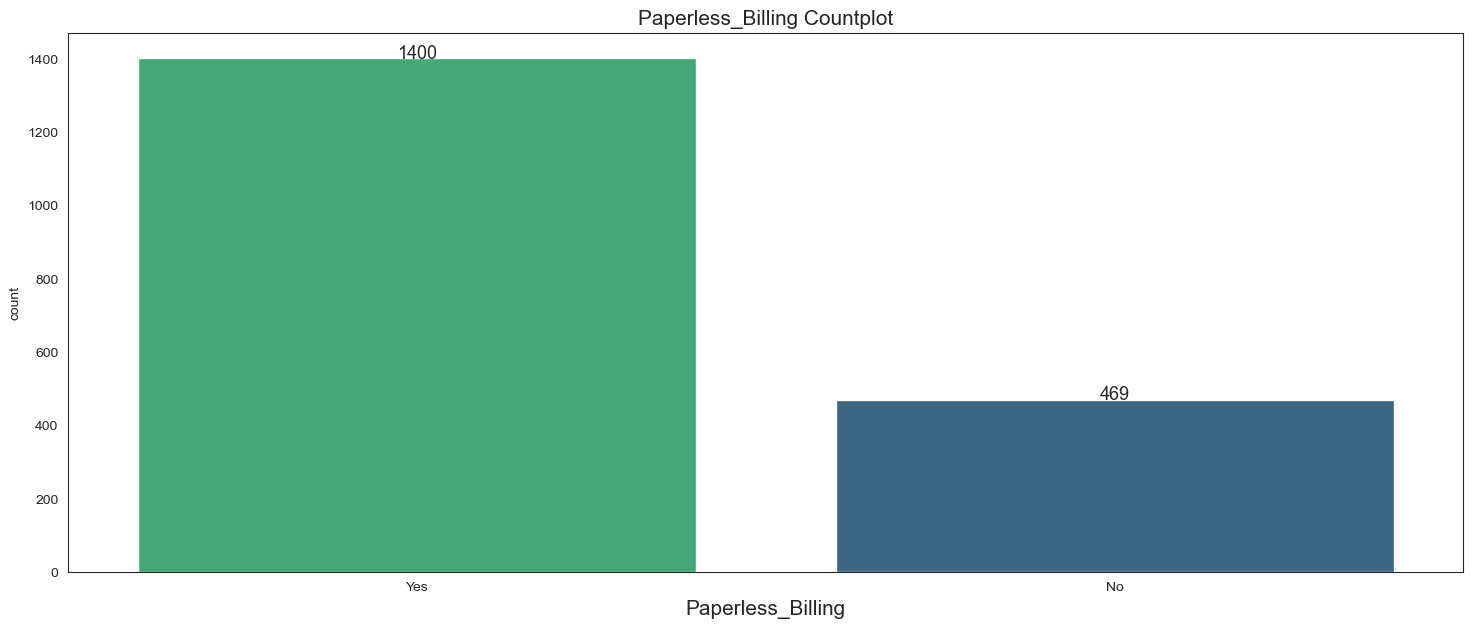

In [591]:
countplot(dataframe=churned,column="Paperless_Billing",palette=random.choice(palette_values))

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



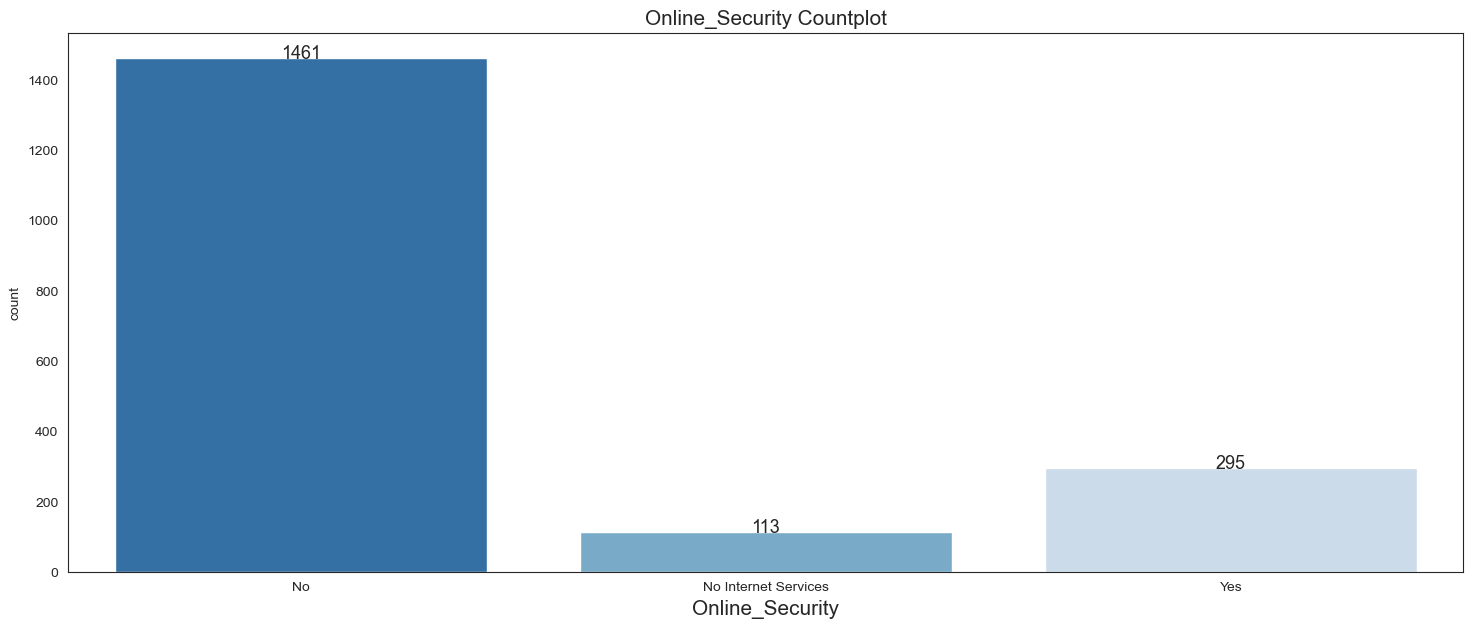

In [592]:
countplot(dataframe=churned,column="Online_Security",palette=random.choice(palette_values))

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



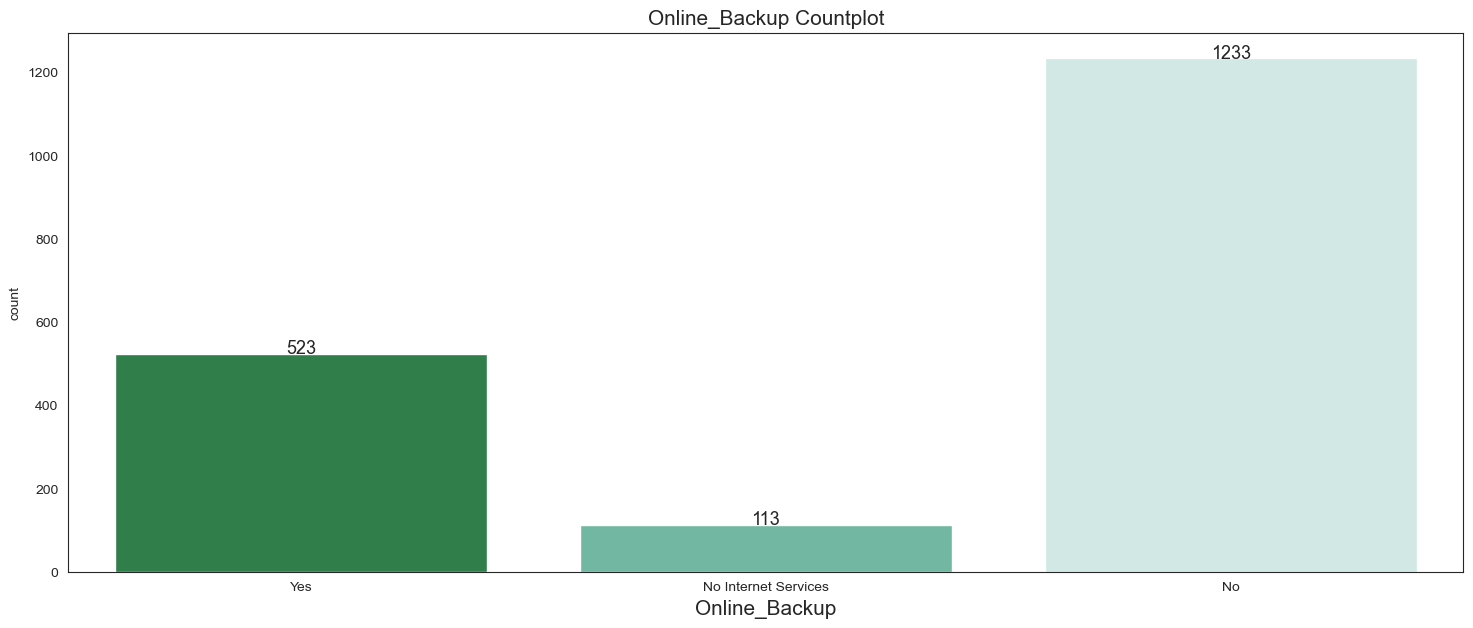

In [593]:
countplot(dataframe=churned,column="Online_Backup",palette=random.choice(palette_values))

### Which specific factors cause consumers to leave?

/Users/nishanthinidhanasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



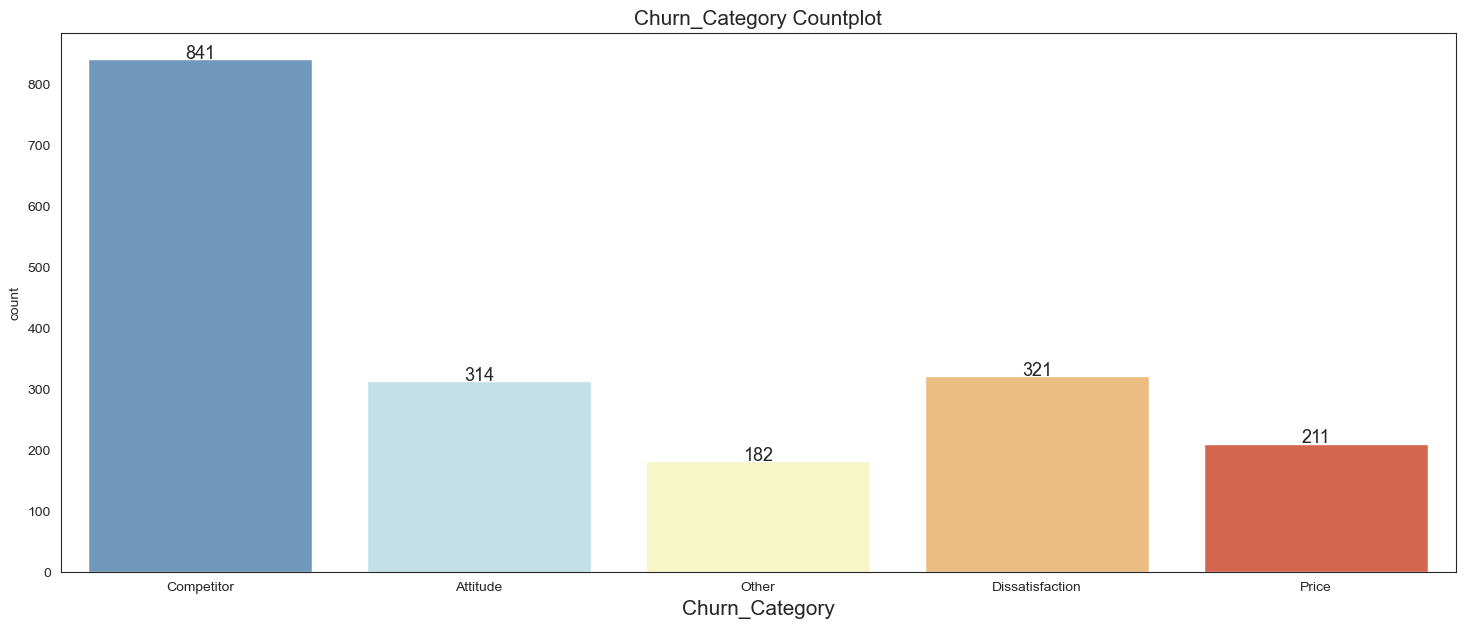

In [594]:
countplot(dataframe=churned,column="Churn_Category",palette=random.choice(palette_values))

The primary cause of churn in the firm is competitors.